<a name="cell-solving"></a>

# 5. With great power comes great responsiblity: Using Linear Algebra for Good

1. [Scaling / Artifical Ill-Conditioning](#cell-sovling-condition-artificial)
2. [Multicollinearity and Variance Inflation Factors (VIFs)](#cell-sovling-Axb-math-multicollinearity)
3. [Principal Components Analysis (PCA)](#cell-sovling-Axb-math-pca) [$X=UDV^T$](#cell-sovling-X-UDVt)
    <!-- 1. [Why use PCA?](#cell-sovling-X-UDVt) -->
    1. [SVD Versus Eigendecomposition for PCA (or PCR)](#cell-sovling-X-UDVt)
    2. [Independent Components Analysis (ICA)](#cell-sovling-Axb-math-ica)
4. [Principal Components Regression (PCR)](#cell-sovling-Axb-math-pcr)
5. [$Ax=b\;$in a few ways that aren't$\;A^{-1}$](#cell-sovling-Axb)
    1. [The return of the SVD](#cell-sovling-svd)
    2. [The Cholesky](#cell-sovling-chol)
    3. [Multivariate Normal](#cell-sovling-chol-mvn)
    4. [Square Root Decomposition](#cell-sovling-mvn)
    5. [$QR$ Decomposition](#cell-sovling-qr)

    





# 5. With great power comes great responsiblity: Using Linear Algebra for Good

Understanding <u>linear algebra</u> greatly clarifies both computational behavior and applied analysis

- Magnitude differences in the ***singular values*** lead to ***numerical roundoff error*** 
- Magnitude differences in the ***singular values*** lead to an ***ill-conditioned*** matrix multiplication problem 

> <font style="color:white"> The end of the previous STA410_W24_Week4_Lecture_NumericalErrors.ipynb notebook introduced ***singular value decomposition (SVD)*** and defined ***matrix condition number*** as the ratio of the largest to smallest ***singular values*** $\frac{\lambda_{\max}}{\lambda_{\min}}$ </font>

> <font style="color:white"> See STA410_W24_Extra_DerivingMatrixCondition.ipynb for a formalization of the $\frac{\lambda_{\max}}{\lambda_{\min}}$ ***matrix condition number*** as bounding the matrix multiplication problem's ***condition***</font>


- <font style="color:white"> For a more general review of the core ***linear algebra*** concepts that we will continue to build upon in this current notebook, please review the again highly relevant STA410_W24_Week4_Prerequesite_LinearAlgebra.ipynb notebook </font>


# 5. With great power comes great responsiblity: Using Linear Algebra for Good

Understanding <u>linear algebra</u> greatly clarifies both computational behavior and applied analysis

- Magnitude differences in the ***singular values*** lead to ***numerical roundoff error*** 
- Magnitude differences in the ***singular values*** lead to an ***ill-conditioned*** matrix multiplication problem 

> The end of the previous `STA410_W24_Week4_Lecture_NumericalErrors.ipynb` notebook introduced ***singular value decomposition (SVD)*** and defined ***matrix condition number*** as the ratio of the largest to smallest ***singular values*** $\frac{\lambda_{\max}}{\lambda_{\min}}$

> See `STA410_W24_Extra_DerivingMatrixCondition.ipynb` for a formalization of the $\frac{\lambda_{\max}}{\lambda_{\min}}$ ***matrix condition number*** as bounding the matrix multiplication problem's ***condition***


- For a more general review of the core ***linear algebra*** concepts that we will continue to build upon in this current notebook, please review the again highly relevant `STA410_W24_Week4_Prerequesite_LinearAlgebra.ipynb` notebook 


<a name="cell-sovling-condition-artificial"></a>

# 5.1 Scaling / Artifical Ill-Conditioning ([Return to TOC](#cell-solving))

---

- $X$ will be ***ill-conditioned*** when column scales $X_{\cdot i}$ and $X_{\cdot j}$ are very different<br>$\quad\longrightarrow\quad$ this causes the ***singular values*** $\lambda_i$ and $\lambda_j$ of the matrix (in ***SVD*** $X=UDV^T$) to have very different magnitudes

- <font style="color:white">This is <u>***artifical ill-conditioning***</u> in the case of a ***design matrix*** $X$<br>$\quad\longrightarrow\quad$ the columns can just be rescaled to produced ***well-conditioned*** $\tilde X$</font>

    > <font style="color:white">Remember the ever-present recommendation "center and scale your data" for regression?<font>
    > -  <font style="color:white">Or how $E[X^2]-E[X]^2$ variance calcultions can break on "uncentered" data but would work just fine for "centered" data?</font>
    >
    > <font style="color:white">Centering and scaling your data just fixes ***artifical ill-conditioning*** problems...</font>

<!-- This is because the sum of the ***singular values*** are [bounded](https://math.stackexchange.com/questions/1472420/upper-bound-for-the-sum-of-absolute-values-of-the-eigenvalues) by the sum of the elements of a matrix; thus,  -->

<br><br><br>


<a name="cell-sovling-condition-artificial"></a>

# 5.1 Scaling / Artifical Ill-Conditioning ([Return to TOC](#cell-solving))

---

- $X$ will be ***ill-conditioned*** when column scales $X_{\cdot i}$ and $X_{\cdot j}$ are very different<br>$\quad\longrightarrow\quad$ this causes the ***singular values*** $\lambda_i$ and $\lambda_j$ of the matrix (in ***SVD*** $X=UDV^T$) to have very different magnitudes

- This is <u>***artifical ill-conditioning***</u> in the case of ***design matrix*** $X$<br>$\quad\longrightarrow\quad$ the columns can just be rescaled to produced ***well-conditioned*** $\tilde X$

    > Remember the ever-present recommendation "center and scale your data" for regression?
    > -  Or how $E[X^2]-E[X]^2$ variance calcultions can break on "uncentered" data 
    but would work just fine for "centered" data?
    >
    > Centering and scaling your data just fixes ***artifical ill-conditioning*** problems...

<!-- This is because the sum of the ***singular values*** are [bounded](https://math.stackexchange.com/questions/1472420/upper-bound-for-the-sum-of-absolute-values-of-the-eigenvalues) by the sum of the elements of a matrix; thus,  -->

<br><br><br>


<a name="cell-sovling-condition-artificial"></a>

# 5.1 Scaling / Artifical Ill-Conditioning ([Return to TOC](#cell-solving))

---

- $X$ will be ***ill-conditioned*** when ~~column~~ROW scales $X_{k\cdot }$ and $X_{l\cdot }$ are very different<br>$\quad\longrightarrow\quad$ this causes the ***singular values*** $\lambda_k$ and $\lambda_l$ of the matrix (in ***SVD*** $X=UDV^T$) to have very different magnitudes

- This is <u>***artifical ill-conditioning***</u> in the case of some ***matrix*** $X$<br>$\quad\longrightarrow\quad$ the ~~columns~~ROWS can just be rescaled to produced ***well-conditioned*** $\tilde X$


<span style="color:white">
    
***Multivariate first-order Taylor approximations*** to systems of nonlinear equations 

$$\overset{\text{nonlinear system}}{\underset{\text{of equations}}{b = f(x)}} \approx \underbrace{f(x^{(t)}) + \overbrace{\left[\begin{array}{ccc}\frac{\partial f_1(x^{(t)})}{\partial x_1} & \cdots & \frac{\partial f_1(x^{(t)})}{\partial x_p} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_n(x^{(t)})}{\partial x_1} & \cdots & \frac{\partial f_n(x^{(t)})}{\partial x_p} 
\end{array} \right]}^{\text{the Jacobian } J_{f(x)}(x^{(t)}) \,=\, \nabla_{f(x)}(x^{(t)})^T}  (x-x^{(t)})}_{\text{Approximated as a system of } \underset{\color{white}{b \,\approx\, f(x^{(t)})+  J_{f(x)}(x^{(t)} (x-x^{(t)})}}{\text{linear equations }b \,\approx\, c+Ax'}} \quad \begin{array}{l}\text{can be rescaled, i.e., to $c_ib_i = c_if_i(x)$}\\\text{(rescaling outcome variables of $f$)}\\\text{to remove magnitude differences}\\\text{between parital derivatives rows}\\\text{so the }\textbf{Jacobian}\text{ is }\textbf{well-conditioned}\end{array}$$
    
</span>


<a name="cell-sovling-condition-artificial"></a>

# 5.1 Scaling / Artifical Ill-Conditioning ([Return to TOC](#cell-solving))

---

- $X$ will be ***ill-conditioned*** when ~~column~~ROW scales $X_{k\cdot }$ and $X_{l\cdot }$ are very different<br>$\quad\longrightarrow\quad$ this causes the ***singular values*** $\lambda_k$ and $\lambda_l$ of the matrix (in ***SVD*** $X=UDV^T$) to have very different magnitudes

- This is <u>***artifical ill-conditioning***</u> in the case of some ***matrix*** $X$<br>$\quad\longrightarrow\quad$ the ~~columns~~ROWS can just be rescaled to produced ***well-conditioned*** $\tilde X$

***Multivariate first-order Taylor approximations*** to systems of nonlinear equations 

$$\overset{\text{nonlinear system}}{\underset{\text{of equations}}{b = f(x)}} \approx \underbrace{f(x^{(t)}) + \overbrace{\left[\begin{array}{ccc}\frac{\partial f_1(x^{(t)})}{\partial x_1} & \cdots & \frac{\partial f_1(x^{(t)})}{\partial x_p} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_n(x^{(t)})}{\partial x_1} & \cdots & \frac{\partial f_n(x^{(t)})}{\partial x_p} 
\end{array} \right]}^{\text{the Jacobian } J_{f(x)}(x^{(t)}) \,=\, \nabla_{f(x)}(x^{(t)})^T}  (x-x^{(t)})}_{\text{Approximated as a system of } \underset{\color{gray}{b \,\approx\, f(x^{(t)})+  J_{f(x)}(x^{(t)} (x-x^{(t)})}}{\text{linear equations }b \,\approx\, c+Ax'}} \quad \begin{array}{l}\text{can be rescaled, i.e., to $c_ib_i = c_if_i(x)$}\\\text{(rescaling outcome variables of $f$)}\\\text{to remove magnitude differences}\\\text{between parital derivatives rows}\\\text{so the }\textbf{Jacobian}\text{ is }\textbf{well-conditioned}\end{array}$$



<a name="cell-sovling-Axb-math-multicollinearity"></a>
# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))
---
***Multicollinearity*** (the degree to which the covariates are linear combinations of each other)<br> figures prominently in ***linear model regression*** contexts and <u>is driven by ***singular values***</u>

<font style="color:white">For ***design matrix*** $X_{n\times p} = U_{n\times r} D_{r \times r} (V^T)_{r\times p}$</font>

- <font style="color:white">$r<p$ means some columns of $X$ are perfectly ***collinear*** making $X$ statistically intractable without alteration</font>

- <font style="color:white">$r=p$ means $X$ is technically ***full rank***; but, whenever ***singular values*** $\lambda_j = D_{jj}$ are relatively very small<br>the numerical contribution of ***loadings*** $U_{\cdot j}$ and ***basis vectors*** $V_{\cdot j}$ constructing $X$ degrade due ***roundoff error***</font> 
    - <font style="color:white">(and if totally lost in ***roundoff error***, then $X$ IS ***non-full rank*** numerically speaking)</font>

<font style="color:white">When 
$$X_{n\times p} = U_{n\times p} D_{p \times p} (V^T)_{p\times p} \approx U_{n\times r} D_{r \times r} (V^T)_{r\times p} \;\text{ for } r<p$$</font>

<font style="color:white">then $X$ is behaving numerically like it's characteristically ***non-full rank***, which is exactly when there's ***high multicollinearity***</font>
- <font style="color:white">The relative magnitudes of the ***singular values*** of $X$ characterize the degree the ***multicollinearity*** present in $X$...</font>


<a name="cell-sovling-Axb-math-multicollinearity"></a>
# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))
---
***Multicollinearity*** (the degree to which the covariates are linear combinations of each other)<br> figures prominently in ***linear model regression*** contexts and <u>is driven by ***singular values***</u>


For ***design matrix*** $X_{n\times p} = U_{n\times r} D_{r \times r} (V^T)_{r\times p}$

- $r<p$ means some columns of $X$ are perfectly ***collinear*** making $X$ statistically intractable without alteration

- $r=p$ means $X$ is technically ***full rank***; but, whenever ***singular values*** $\lambda_j = D_{jj}$ are relatively very small<br>the numerical contribution of ***loadings*** $U_{\cdot j}$ and ***basis vectors*** $V_{\cdot j}$ constructing $X$ degrade due ***roundoff error*** 
    - (and if totally lost in ***roundoff error***, then $X$ IS ***non-full rank*** numerically speaking)

<font style="color:white">When 
$$X_{n\times p} = U_{n\times p} D_{p \times p} (V^T)_{p\times p} \approx U_{n\times r} D_{r \times r} (V^T)_{r\times p} \;\text{ for } r<p$$</font>

<font style="color:white">then $X$ is behaving numerically like it's characteristically ***non-full rank***, which is exactly when there's ***high multicollinearity***</font>
- <font style="color:white">The relative magnitudes of the ***singular values*** of $X$ characterize the degree the ***multicollinearity*** present in $X$...</font>


<a name="cell-sovling-Axb-math-multicollinearity"></a>
# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))
---
***Multicollinearity*** (the degree to which the covariates are linear combinations of each other)<br> figures prominently in ***linear model regression*** contexts and <u>is driven by ***singular values***</u>

For ***design matrix*** $X_{n\times p} = U_{n\times r} D_{r \times r} (V^T)_{r\times p}$

- $r<p$ means some columns of $X$ are perfectly ***collinear*** making $X$ statistically intractable without alteration

- $r=p$ means $X$ is technically ***full rank***; but, whenever ***singular values*** $\lambda_j = D_{jj}$ are relatively very small<br>the numerical contribution of ***loadings*** $U_{\cdot j}$ and ***basis vectors*** $V_{\cdot j}$ constructing $X$ degrade due ***roundoff error*** 
    - (and if totally lost in ***roundoff error***, then $X$ IS ***non-full rank*** numerically speaking)

When 
$$X_{n\times p} = U_{n\times p} D_{p \times p} (V^T)_{p\times p} \approx U_{n\times r} D_{r \times r} (V^T)_{r\times p} \;\text{ for } r<p$$

then $X$ is behaving numerically like it's characteristically ***non-full rank***, which is exactly when there's ***high multicollinearity***
- The relative magnitudes of the ***singular values*** of $X$ characterize the degree the ***multicollinearity*** present in $X$...


<a name="cell-sovling-Axb-math-multicollinearity"></a>

# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))

---

***Variance Inflation Factors (VIFs)*** $\frac {1}{1-R_{j}^{2}}$ quantify  ***multicollinearity*** <font style="color:gray">(which might also be called "observed covariate confounding")</font>

> $R_{j}^{2}$ is the ***coefficient of determination*** for the regression of $X_{j}$ on all others except $X_{j}$
> 
> $${\displaystyle X_{j}= \alpha_{0}+\alpha_{1}X_{1} + \alpha_{2}X_{2}+\cdots + \underset{\text{no } X_j}{\alpha_{j-1}X_{j-1} + \alpha_{j+1}X_{j+1}}+\cdots\alpha_{k}X_{p}}+\epsilon$$

<span style="color:white">
The more predictive $X_{j}$ is of the others the larger $R^2_j$ is and the more the coefficient uncertainty *inflates*

$$ {\displaystyle {\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} =  {\frac {s^{2}}{(n-1){\widehat {\operatorname {var} }}(X_{j})}}\cdot \underset{VIF}{\frac {1}{1-R_{j}^{2}}}} \quad \begin{array}{ll}\text{$s^2$ is the }\textbf{residual variance}\\\text{ of the original regression}\end{array}$$

But this can be reformulated in terms of ***singular values*** which shows that
<span>
    
- <font style="color:white">it's small ***singular values*** $\lambda_i = D_{jj}$ of ***design matrix*** $X$ lead to *inflated* ${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})$ 
$${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} = s^{2}[(VD^2V^T)^{-1}]_{jj} = s^{2}[(VD^{-2}V^T)]_{jj} = s^2 \sum_{i=1}^{p}V_{ji}^2D_{ii}^{-2}$$</font>


<a name="cell-sovling-Axb-math-multicollinearity"></a>

# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))

---

***Variance Inflation Factors (VIFs)*** $\frac {1}{1-R_{j}^{2}}$ quantify  ***multicollinearity*** <font style="color:gray">(which might also be called "observed covariate confounding")</font>

> $R_{j}^{2}$ is the ***coefficient of determination*** for the regression of $X_{j}$ on all others except $X_{j}$
> 
> $${\displaystyle X_{j}= \alpha_{0}+\alpha_{1}X_{1} + \alpha_{2}X_{2}+\cdots + \underset{\text{no } X_j}{\alpha_{j-1}X_{j-1} + \alpha_{j+1}X_{j+1}}+\cdots\alpha_{k}X_{p}}+\epsilon$$


The more predictive $X_{j}$ is of the others the larger $R^2_j$ is and the more the coefficient uncertainty *inflates*

$$ {\displaystyle {\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} =  {\frac {s^{2}}{(n-1){\widehat {\operatorname {var} }}(X_{j})}}\cdot \underset{VIF}{\frac {1}{1-R_{j}^{2}}}} \quad \begin{array}{ll}\text{$s^2$ is the }\textbf{residual variance}\\\text{ of the original regression}\end{array}$$

<span style="color:white">
But this can be reformulated in terms of ***singular values*** which shows that
<span>
    
- <font style="color:white">it's small ***singular values*** $\lambda_i = D_{jj}$ of ***design matrix*** $X$ lead to *inflated* ${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})$ 
$${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} = s^{2}[(VD^2V^T)^{-1}]_{jj} = s^{2}[(VD^{-2}V^T)]_{jj} = s^2 \sum_{i=1}^{p}V_{ji}^2D_{ii}^{-2}$$</font>


<a name="cell-sovling-Axb-math-multicollinearity"></a>

# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs) ([Return to TOC](#cell-solving))

---

***Variance Inflation Factors (VIFs)*** $\frac {1}{1-R_{j}^{2}}$ quantify  ***multicollinearity*** <font style="color:gray">(which might also be called "observed covariate confounding")</font>

> $R_{j}^{2}$ is the ***coefficient of determination*** for the regression of $X_{j}$ on all others except $X_{j}$
> 
> $${\displaystyle X_{j}= \alpha_{0}+\alpha_{1}X_{1} + \alpha_{2}X_{2}+\cdots + \underset{\text{no } X_j}{\alpha_{j-1}X_{j-1} + \alpha_{j+1}X_{j+1}}+\cdots\alpha_{k}X_{p}}+\epsilon$$

The more predictive $X_{j}$ is of the others the larger $R^2_j$ is and the more the coefficient uncertainty *inflates*

$$ {\displaystyle {\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} =  {\frac {s^{2}}{(n-1){\widehat {\operatorname {var} }}(X_{j})}}\cdot \underset{VIF}{\frac {1}{1-R_{j}^{2}}}} \quad \begin{array}{ll}\text{$s^2$ is the }\textbf{residual variance}\\\text{ of the original regression}\end{array}$$

But this can be reformulated in terms of ***singular values*** which shows that

- it's small ***singular values*** $\lambda_i = D_{jj}$ of ***design matrix*** $X$ lead to *inflated* ${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})$ 
$${\widehat {\operatorname {var} }}({\hat {\beta }}_{j})=s^{2}[(X^{T}X)^{-1}]_{jj} = s^{2}[(VD^2V^T)^{-1}]_{jj} = s^{2}[(VD^{-2}V^T)]_{jj} = s^2 \sum_{i=1}^{p}V_{ji}^2D_{ii}^{-2}$$


# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs)

---


In [1]:
import numpy as np; from scipy import stats; import statsmodels.api as sm; import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF # https://en.wikipedia.org/wiki/Variance_inflation_factor#Calculation_and_analysis

In [2]:
# very low multicollinearity so there's minimal variance inflation
n = 100; X = stats.multivariate_normal(cov=np.array(((1,.09),(.09,1)))).rvs(n); X=(X-X.mean(axis=0))/X.std(axis=0); print("X columns ARE standardized:", "column means", X.mean(axis=0), "column standard deviations",  X.std(axis=0))
X = sm.add_constant(X); Y = X.dot(np.ones(3)) + stats.norm().rvs(n); model = sm.OLS(Y,X); results = model.fit(); print(results.summary2().tables[2].values[3,2:]); results.summary2().tables[1]

X columns ARE standardized: column means [8.21565038e-17 3.49720253e-17] column standard deviations [1. 1.]
['Condition No.:' '1']


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.030566,0.093325,11.042762,7.647357e-19,0.845342,1.215791
x1,0.924965,0.095155,9.720636,5.378723e-16,0.736109,1.113821
x2,0.904045,0.095155,9.500785,1.605467e-15,0.715189,1.092901


In [3]:
print("Variance Inflation Factors", VIF(X,0),VIF(X,1),VIF(X,2))

Variance Inflation Factors 1.0 1.0395967439003335 1.0395967439003335


In [4]:
s = (float(results.summary2().tables[0].iloc[-1,-1]))**.5 # residual error
XtXinv = np.linalg.inv(X.T.dot(X)); print('s(X^TX)^{-1/2}                  ', s*np.diag(XtXinv)**0.5)
VIF_formula = np.array([VIF(X,0),VIF(X,1),VIF(X,2)]) # This formula doesn't work for the intercept since Var(X_intercept)=0
VIF_formula[1:] = s*(VIF_formula[1:]/((n-1)*X.var(ddof=1,axis=0)[1:]))**0.5; VIF_formula[0] = s*XtXinv[0,0]**0.5; print('s(VIF/(n-1)*Var[X])^{-1/2}      ', VIF_formula)
U,D,Vt = np.linalg.svd(X, full_matrices=False)
print("\nSingular Values", list(D), "Singular Values^{-2}", list(D**(-2)))
XtXinv_by_svd = (Vt.T*D**(-2)).dot(Vt) # will be the same (sans numeric error) to XtXinv
XtXinv_by_svd_diag = (Vt.T**2*D**-2).sum(axis=1); print('s*(SUM_i V_ij^2 D_ii^{-2})^{1/2}', s*XtXinv_by_svd_diag**0.5) 
# confirming that these coefficient variances depend on the singular values

s(X^TX)^{-1/2}                   [0.09332524 0.09515499 0.09515499]
s(VIF/(n-1)*Var[X])^{-1/2}       [0.09332524 0.09515499 0.09515499]

Singular Values [10.932350655916524, 10.0, 8.971271322175104] Singular Values^{-2} [0.008367060195489186, 0.01, 0.012424874682517491]
s*(SUM_i V_ij^2 D_ii^{-2})^{1/2} [0.09332524 0.09515499 0.09515499]


# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs)

---


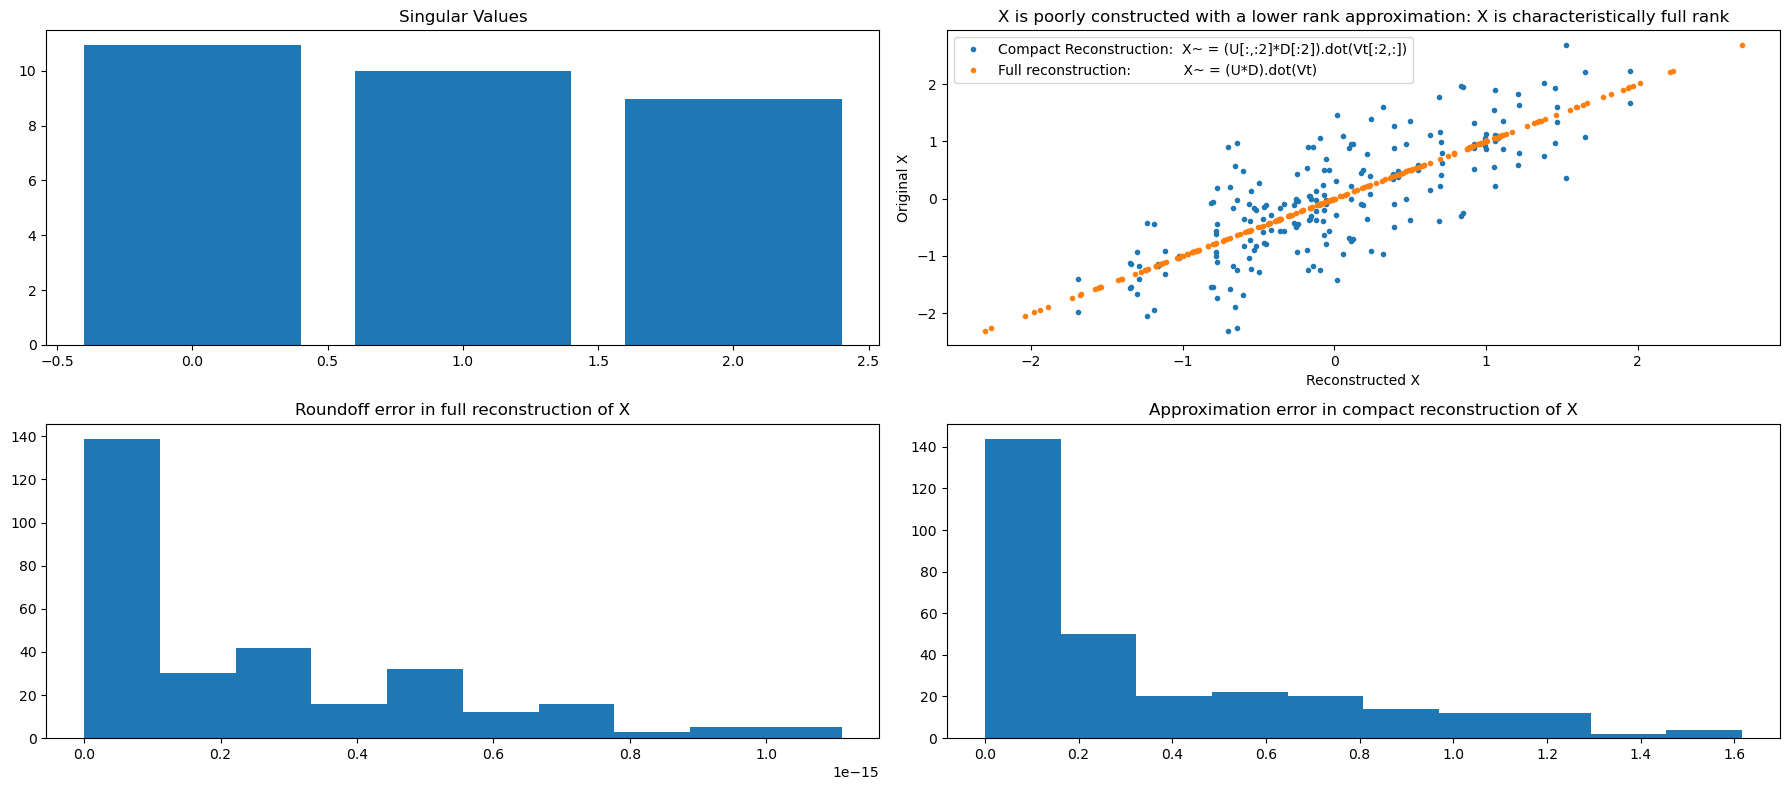

In [5]:
U,D,Vt = np.linalg.svd(X, full_matrices=False)
fig,ax = plt.subplots(2,2, figsize=(18,8)); ax[0,0].bar(x=range(3), height=D); ax[0,0].set_title("Singular Values"); 
# This shows that the approximate reconstruction of X is very poor 
ax[1,0].hist(np.abs(U.dot(np.diag(D)).dot(Vt) - X).flatten()); ax[1,1].hist(np.abs(U[:,:2].dot(np.diag(D[:2])).dot(Vt[:2,:])-X).flatten()); ax[1,0].set_title("Roundoff error in full reconstruction of X"); ax[1,1].set_title("Approximation error in compact reconstruction of X"); ax[0,1].plot((U[:,:2].dot(np.diag(D[:2])).dot(Vt[:2,:])).ravel(), X.ravel(),'.', label='Compact Reconstruction:  X~ = (U[:,:2]*D[:2]).dot(Vt[:2,:])'); ax[0,1].plot((U.dot(np.diag(D)).dot(Vt)).ravel(), X.ravel(),'.', label='Full reconstruction:            X~ = (U*D).dot(Vt)'); ax[0,1].set_title("X is poorly constructed with a lower rank approximation: X is characteristically full rank"); ax[0,1].set_ylabel("Original X"); ax[0,1].set_xlabel("Reconstructed X"); ax[0,1].legend(); fig.tight_layout()

# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs)

---


In [6]:
# The standard errors are inflated for highly multicolliner X
n = 100; X = stats.multivariate_normal(cov=np.array(((1,.99),(.99,1)))).rvs(n); X=(X-X.mean(axis=0))/X.std(axis=0); print("X columns ARE standardized:", "column means", X.mean(axis=0), "column standard deviations",  X.std(axis=0))
X = sm.add_constant(X); Y = X.dot(np.ones(3)) + stats.norm().rvs(n); model = sm.OLS(Y,X); results = model.fit(); print(results.summary2().tables[2].values[3,2:]); results.summary2().tables[1]

X columns ARE standardized: column means [-6.55031585e-17  3.33066907e-18] column standard deviations [1. 1.]
['Condition No.:' '15']


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.166546,0.108154,10.785923,2.718493e-18,0.951889,1.381202
x1,0.338703,0.798411,0.424221,6.723437e-01,-1.245921,1.923327
x2,1.886027,0.798411,2.362226,2.016276e-02,0.301402,3.470651


In [7]:
print("Variance Inflation Factors", VIF(X,0),VIF(X,1),VIF(X,2))

Variance Inflation Factors 0.9999999999999998 54.49591650298695 54.49591650298695


In [8]:
s = (float(results.summary2().tables[0].iloc[-1,-1]))**.5 # residual error
XtXinv = np.linalg.inv(X.T.dot(X)); print('s(X^TX)^{-1/2}                  ', s*np.diag(XtXinv)**0.5)
VIF_formula = np.array([VIF(X,0),VIF(X,1),VIF(X,2)])
# This formula doesn't work for the intercept since Var(X_intercept)=0
VIF_formula[1:] = s*(VIF_formula[1:]/((n-1)*X.var(ddof=1,axis=0)[1:]))**0.5; VIF_formula[0] = s*XtXinv[0,0]**0.5; print('s(VIF/(n-1)*Var[X])^{-1/2}      ', VIF_formula)
U,D,Vt = np.linalg.svd(X, full_matrices=False)
print("\nSingular Values", list(D), "Singular Values^{-2}", list(D**(-2)))
XtXinv_by_svd = (Vt.T*D**(-2)).dot(Vt) # will be the same (sans numeric error) to XtXinv
XtXinv_by_svd_diag = (Vt.T**2*D**-2).sum(axis=1); print('s*(SUM_i V_ij^2 D_ii^{-2})^{1/2}', s*XtXinv_by_svd_diag**0.5) 
# confirming that these coefficient variances depend on the singular values

s(X^TX)^{-1/2}                   [0.10815267 0.7983976  0.7983976 ]
s(VIF/(n-1)*Var[X])^{-1/2}       [0.10815267 0.7983976  0.7983976 ]

Singular Values [14.109509274423184, 10.0, 0.9600770984488548] Singular Values^{-2} [0.005023150395029791, 0.01, 1.0848951796647082]
s*(SUM_i V_ij^2 D_ii^{-2})^{1/2} [0.10815267 0.7983976  0.7983976 ]


# 5.2 Multicollinearity<br>and Variance Inflation Factors (VIFs)

---


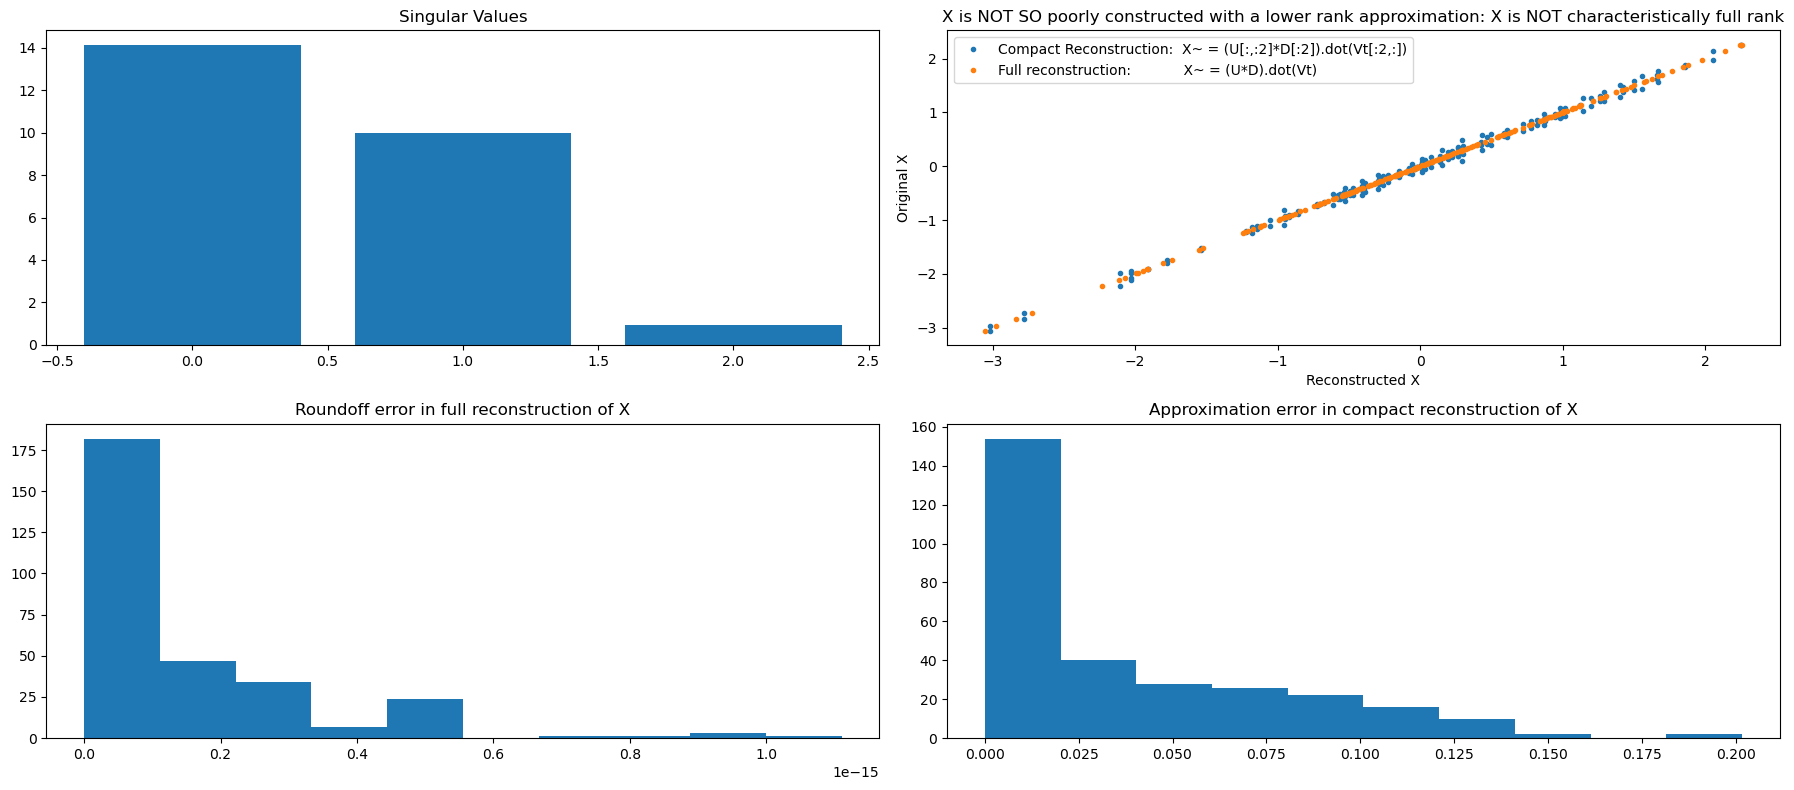

In [9]:
U,D,Vt = np.linalg.svd(X, full_matrices=False)
fig,ax = plt.subplots(2,2, figsize=(18,8)); ax[0,0].bar(x=range(3), height=D); ax[0,0].set_title("Singular Values"); 
# This shows that the approximate reconstruction of X is very poor 
ax[1,0].hist(np.abs(U.dot(np.diag(D)).dot(Vt) - X).flatten()); ax[1,1].hist(np.abs(U[:,:2].dot(np.diag(D[:2])).dot(Vt[:2,:])-X).flatten()); ax[1,0].set_title("Roundoff error in full reconstruction of X"); ax[1,1].set_title("Approximation error in compact reconstruction of X"); ax[0,1].plot((U[:,:2].dot(np.diag(D[:2])).dot(Vt[:2,:])).ravel(), X.ravel(),'.', label='Compact Reconstruction:  X~ = (U[:,:2]*D[:2]).dot(Vt[:2,:])'); ax[0,1].plot((U.dot(np.diag(D)).dot(Vt)).ravel(), X.ravel(),'.', label='Full reconstruction:            X~ = (U*D).dot(Vt)'); ax[0,1].set_title("X is NOT SO poorly constructed with a lower rank approximation: X is NOT characteristically full rank"); ax[0,1].set_ylabel("Original X"); ax[0,1].set_xlabel("Reconstructed X"); ax[0,1].legend(); fig.tight_layout()

<a name="cell-sovling-Axb-math-pca"></a>

# 5.3 Principal Components Analysis (PCA) $X=UDV^T$ ([Return to TOC](#cell-solving))

---

[***Principal Components Analysis***](https://en.wikipedia.org/wiki/Principal_component_analysis) (***PCA***) is an ***unsupervised learning*** methodology uncovering linear structure in $X_{n \times m}$. 

a ***PCA*** is computed as either

$$\underbrace{\tilde X \div \sqrt{n} = U_{n \times m}D_{m \times m}(V^T)_{m \times m}}_{\text{singular value decomposition of the data matrix}}\quad\text{ or }\quad
\underbrace{\hat \Sigma = (\tilde X^T\tilde X \div n) = V_{m \times m}D^2_{m \times m}V^T_{m \times m}}_{\text{eigendecomposition of the data covariance matrix}}$$

where the data columns of $X_{n \times m}$ are centered and scaled by their column means $\overline{X_{\cdot j}}$ and standard deviations $\hat \sigma_{X_{\cdot j}}$ as $\tilde X_{\cdot j}  = (X_{\cdot j} - \overline{X_{\cdot j}}) / \hat \sigma_{X_{\cdot j}}$ <font style="color:gray">(unless the original scales of the data are part of the information that should be extracted)</font>
 
This shows [the connection](https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca) between ***SVD*** $X=UDV^T$ and the ***eigendecomposition*** of the  ***gramian matrix*** $X^TX = V D^2 V^T$ whose ***eigenvalues*** are the square of the ***singular values*** of $X$ and whose ***(semi-)orthonormal*** matrix $V^T$ is equal to that of the ***SVD*** and actually ***orthonormal*** for ***full rank*** $X$ (if the ***gramian*** is ***positive definite*** so all ***eigenvalues*** are ***nonnegative***).

In [10]:
mtcars = sm.datasets.get_rdataset("mtcars"); Xtilde = (mtcars.data - mtcars.data.mean())/np.std(mtcars.data); U,D,Vt = np.linalg.svd(Xtilde/np.sqrt(Xtilde.shape[0])) # The actually PCA computation...
# Xtilde.dot(Xtilde)/n is the sample covariance matrix for "centered" Xtilde 
# The trace of the sample covariance matrix is the sum of the diagonal of the covariance matrix... which is the sum of the variances.
# - There are 11 variables and the Xtilde has been "standardized" so each variance is 1... so the trace is 11.
# The sum of the eigenvalues of a square matrix equals the trace of the square matrix... the sum of the eigenvalues is thus the sum of the variances. 
np.var(Xtilde).values, (np.var(Xtilde).sum(), (D**2).sum()), D**2 

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 (11.0, 11.000000000000005),
 array([6.60840025, 2.65046789, 0.62719727, 0.26959744, 0.2234511 ,
        0.21159612, 0.13526199, 0.12290143, 0.07704665, 0.05203544,
        0.02204441]))

# 5.3 Principal Components Analysis (PCA) 

---

***PCA*** is the ***SVD*** of $X_{n \times m}=U_{n \times m}D_{m \times m}(V^T)_{m \times m}$ which provides 

<span style="font-size:48px">
<table><tr><td><list><li><b>Principle directions</b> in $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{\cdot j}$ (columns of $V$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which are <b>semi-orthonormal</b> ($V_{\cdot j}V_{\cdot j}^T=1$) </li><br>
    <li><b>Loadings (projections)</b> of $X_{i \cdot}$ &nbsp;&nbsp;&nbsp;&nbsp; $U_{i \cdot}$ (rows of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;onto this coordinate system &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U=XVD^{-1}$</li><br>
    <li><b>Principle components</b> of $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U_{\cdot j}$ (columns of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which are <b>semi-orthonormal</b> ($U_{\cdot j}^TU_{\cdot j}=1$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which also implies they are <b>linearly independent</b></li><br>
    <li><b>Squared singular values</b> $\lambda_j^2=D_{jj}^2$ giving the<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"proportion of total variance explained" by each <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V_{\cdot j}$ <b>principal direction</b>; namley, $\require{cancel}\lambda_j^2\cancel{\text{Var}[U_j]}^1$
    </list> </td><td>
<img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></td></tr></table></span>

The collection of $X_{\cdot j}$ are assumed to be (likely ***standardized***) ***independent correlated random variables*** now represented by the ***standardized*** ($E[U_{\cdot j}] = 0$ and $\text{Var}(U_{\cdot j}) = 1$) collection of ***observations*** $U_{\cdot j}$ (scaled by $\lambda_j^2$) indexed in a different coordinate system (defined by orthogonal basis vectors $V_{\cdot j}$)
such that the $U_{\cdot j}$ vectors are ***uncorrelated*** (and hence empirically ***linearly independent***)

<!-- 

# 5.3 Principal Components Analysis (PCA) 

---

***PCA*** is the ***SVD*** of $X_{n \times m}=U_{n \times m}D_{m \times m}(V^T)_{m \times m}$ which provides 

<span style="font-size:48px">
<table><tr><td><list><li><b>Principle directions</b> in $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{\cdot j}$ (columns of $V$) </li><br>
    <li><b>Loadings (projections)</b> of $X_{i \cdot}$ &nbsp;&nbsp;&nbsp;&nbsp; $U_{i \cdot}$ (rows of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;onto this coordinate system &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U=XVD^{-1}$</li><br>
    <li><b>Principle components</b> of $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U_{\cdot j}$ (columns of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which are <b>uncorrelated and linearly independent</b></li><br>
    <li><b>Squared singular values</b> $\lambda_j^2=D_{jj}^2$ giving the<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"proportion of total variance explained" by each $V_{\cdot j}$
    </list> </td><td>
<img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></td></tr></table></span>

With all this in place we can confirm that the sum of the variances equals the sum of the ***squared singular values***: 

$$\require{cancel}\begin{align*}
m = & {} \text{Var}\left(\sum_j X_{\cdot j}\right) = \sum_j \text{Var}\left( X_{\cdot j}\right) = \sum_j \text{E}\left[ X_{\cdot j}^2\right] - \cancel{\text{E}\left[ X_{\cdot j}\right]^2}^0  \\  
{} = & \sum_j \text{E}\left[ (U_{\cdot -}[DV^T]_{\cdot j })^2\right] = \sum_j \text{E}\left[  \sum_i (U_{\cdot i}[D V^T]_{i j })^2 \right] = \sum_j  (VD^2V^T)_{j j}  = \sum_{j} V_{j j}^2D_{jj}^{2} \text{ unfinished}
\end{align*}$$

-->

# 5.3 Principal Components Analysis (PCA) 

---

***PCA*** is the ***SVD*** of $X_{n \times m}=U_{n \times m}D_{m \times m}(V^T)_{m \times m}$ which provides 

<span style="font-size:48px">
<table><tr><td><list><li><b>Principle directions</b> in $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{\cdot j}$ (columns of $V$) </li><br>
    <li><b>Loadings (projections)</b> of $X_{i \cdot}$ &nbsp;&nbsp;&nbsp;&nbsp; $U_{i \cdot}$ (rows of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;onto this coordinate system &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U=XVD^{-1}$</li><br>
    <li><b>Principle components</b> of $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U_{\cdot j}$ (columns of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which are <b>uncorrelated and linearly independent</b></li><br>
    <li><b>Squared singular values</b> $\lambda_j^2=D_{jj}^2$ giving the<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"proportion of total variance explained" by each $V_{\cdot j}$
    </list> </td><td>
<img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></td></tr></table></span>

Each column of $U$ and $X$ are linear combinations of each other...

- $U_{\cdot j} = \left[X  V D^{-1}\right]_{\cdot j} = \sum_{k=1}^m X_{\cdot k} V_{k j}/\lambda_j$ <font style="color:gray">is a "weighted average variable" of the columns of $X$</font>
- $X_{\cdot j} = \left[U D V^T \right]_{\cdot j} = \sum_{k=1}^m \lambda_k U_{\cdot k} [V^T]_{k j} \approx \sum_{k=1}^r \lambda_k U_{\cdot k} [V^T]_{k j}$<font style="color:gray"> is a "weighted average variable" of the columns of $U$</font><br>or can be a low rank approximation based on a ***compact SVD*** reconstruction

and $\require{cancel} \text{Var}[\sum_{j=1}^m \lambda_j U_{\cdot j}] = \sum_{j=1}^m \lambda_j^2 \text{Var}[ U_{\cdot j}] = \sum_{j=1}^m \sum_{k=1}^m  \text{Var}[X_{\cdot k} V_{k j}] = \sum_{j=1}^m \sum_{k=1}^m V_{k j}^2 \cancel{\text{Var}[X_{\cdot k} ]}^1 = \sum_{j=1}^m 1 =m $


# 5.3 Principal Components Analysis (PCA) 

---

***PCA*** is the ***SVD*** of $X_{n \times m}=U_{n \times m}D_{m \times m}(V^T)_{m \times m}$ which provides 

<span style="font-size:48px">
<table><tr><td><list><li><b>Principle directions</b> in $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{\cdot j}$ (columns of $V$) </li><br>
    <li><b>Loadings (projections)</b> of $X_{i \cdot}$ &nbsp;&nbsp;&nbsp;&nbsp; $U_{i \cdot}$ (rows of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;onto this coordinate system &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U=XVD^{-1}$</li><br>
    <li><b>Principle components</b> of $X$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $U_{\cdot j}$ (columns of $U$)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;which are <b>uncorrelated and linearly independent</b></li><br>
    <li><b>Squared singular values</b> $\lambda_j^2=D_{jj}^2$ giving the<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"proportion of total variance explained" by each $V_{\cdot j}$
    </list> </td><td>
<img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png"></td></tr></table></span>



In [420]:
i=1; X = stats.norm.rvs(size=(5,3))
U,d,Vt = np.linalg.svd(X, full_matrices=False)
j=0
print((X @ (Vt.T)[:,[j]] / d[j]).T)
print(U[:,[j]].T)

[[-0.14166014 -0.54567409 -0.49281905 -0.3558868  -0.55914771]]
[[-0.14166014 -0.54567409 -0.49281905 -0.3558868  -0.55914771]]


In [421]:
j=1
print(X[:,[j]].T)
print(((U*d)@Vt[:,[j]]).T)

[[-0.00609111 -1.20704628 -1.48879613 -0.61859934 -0.19793869]]
[[-0.00609111 -1.20704628 -1.48879613 -0.61859934 -0.19793869]]


# 5.3 Principal Components Analysis (PCA) 

---

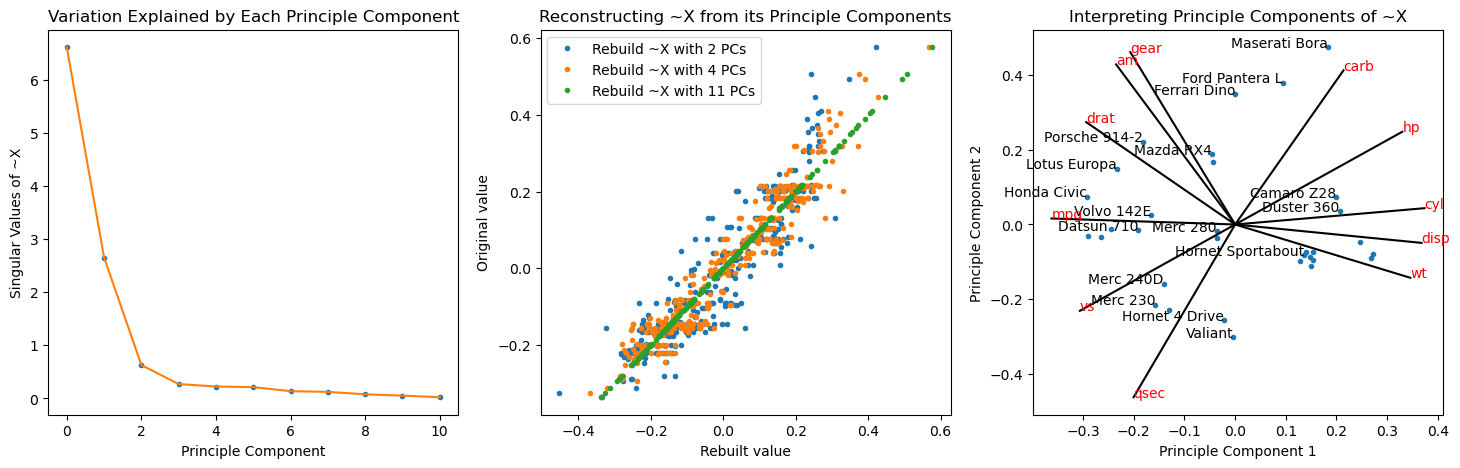

In [424]:
mtcars = sm.datasets.get_rdataset("mtcars"); Xtilde = (mtcars.data - mtcars.data.mean())/np.std(mtcars.data)
U,D,Vt = np.linalg.svd(Xtilde/np.sqrt(Xtilde.shape[0])) # The actually PCA computation...
# Standard PCA analyses for so called "Principle Components": i^th column of U from the SVD is the i^th Principle Component
# A compact SVD approximate reconstruction of Xtilde would use 1st through i^th Principle Components
plt.figure(figsize=(18,5)); plt.subplot(131); plt.plot(D**2,'.'); plt.plot(D**2); plt.xlabel("Principle Component"); plt.ylabel("Singular Values of ~X"); plt.title("Variation Explained by Each Principle Component"); plt.subplot(132); p=2; plt.plot(U[:,:p].dot(np.diag(D[:p])).dot(Vt[:p,:]).flatten(), Xtilde.values.flatten()/Xtilde.shape[0]**.5, '.', label="Rebuild ~X with 2 PCs"); p=4; plt.plot(U[:,:p].dot(np.diag(D[:p])).dot(Vt[:p,:]).flatten(), Xtilde.values.flatten()/Xtilde.shape[0]**.5, '.', label="Rebuild ~X with 4 PCs"); p=11; plt.plot(U[:,:p].dot(np.diag(D[:p])).dot(Vt[:p,:]).flatten(), Xtilde.values.flatten()/Xtilde.shape[0]**.5, '.', label="Rebuild ~X with 11 PCs"); plt.legend(); plt.xlabel("Rebuilt value"); plt.ylabel("Original value"); plt.title("Reconstructing ~X from its Principle Components"); plt.subplot(133); plt.plot(U[:,0],U[:,1],'.'); plt.xlabel("Principle Component 1"); plt.ylabel("Principle Component 2"); plt.title("Interpreting Principle Components of ~X");
for i in range(0, U.shape[0]):
    if all(np.sum(((U[:i,:2]-U[i,:2])**2).dot([[1],[15]]), axis=1) > .02):
        plt.text(U[i,0],U[i,1],mtcars.data.index[i], horizontalalignment="right")
for j in range(Vt.shape[0]):
    plt.plot([0,Vt[0,j]],[0,Vt[1,j]],'k'); plt.text(Vt[0,j], Vt[1,j], mtcars.data.columns[j], color='r')
# Third plot interprets the "Principle Directions" associated with each "Principle Component"
# The first "Principle Component" (the first column of U from the SVD) points in the direction of cyl, disp negative mpg axes
# The elements of the first column of U are the coordinates of the data points along this direction
# The blue points are data points, and you can see their locations relative to the Priniple Directions

<a name="cell-sovling-X-UDVt"></a>

## 5.3.A SVD Versus Eigendecomposition for PCA (or PCR) ([Return to TOC](#cell-solving))

---

The ***PCA*** analyses above used an ***SVD*** computation; however <font style="color:gray">(as discussed in this [stackoverflow](https://stats.stackexchange.com/questions/314046/why-does-andrew-ng-prefer-to-use-svd-and-not-eig-of-covariance-matrix-to-do-pca) conversation),</font><br>there are multiple distinct algorithms which could be used to compute $V^T$ and $D$ (and thus compute ***PCA***)

- `np.linalg.svd(X)`/`np.linalg.svd(X^TX)`/`np.linalg.eig(X^TX)`/`np.linalg.eigh(X^TX)`

But `np.linalg.svd(X)` is the best choice for two reasons:

1. All computations generally entail ***roundoff error*** so $X^TX$ not only requires additional computation,<br>it also unneccesarily introduces numerical inaccuracy 
  - Even the ***singular values***/***eigenvalues*** $D_{ii}^2$ (of $X^TX$) tend to be less precice compared to the numerical accuracy of ***singular values*** $D_{ii}$ (of $X$) since squaring introducess the possibility for ***roundoff error***
  
2. The ***condition*** of $X$ for ***spectral radius*** ${\rho(X) = \max_i D_{ii}} > 1 > \min_j D_{jj}$ is better than the ***condition*** of the ***gramian*** $X^TX$ with ***spectral radius*** ${\rho(X^TX) = \max_i D_{ii}^2} >> 1 >> \min_j D_{jj}^2$ since
   
   $$\kappa(X) = \frac{\max_i D_{ii}}{\min_j D_{jj}} << \frac{\max_i D_{ii}^2}{\min_j D_{jj}^2} = \kappa(X^TX) \quad \text{ or } \quad \kappa(X^TX) = \frac{\lambda_{max}^2}{\lambda_{min}^2} >> \frac{\lambda_{max}}{\lambda_{min}} = \kappa(X)$$



<a name="cell-sovling-Axb-math-pca-pcr"></a>

## 5.3.A SVD Versus Eigendecomposition for PCA (or PCR)

---


In [427]:
np.set_printoptions(precision=7)
n,m = 100,7; X = stats.norm().rvs(size=(n,m)); X = (X - X.mean(axis=0))/X.std(axis=0)
print("The total variance", X.var(axis=0).sum(), end=" "); print("should match the sum of the eigenvalues"); print("which is also equal to the sum of squares of singular values.\n")
# Traditional PCA: eigendecomposition of the covariance matrix; np.linalg.eigh # "complex Hermitian (conjugate symmetric) or a real symmetric matrix."
eignvals = np.sort(np.linalg.eigh(np.cov(X.T, ddof=0))[0])[::-1]; print(eignvals, eignvals.sum())
# Traditional PCA: eigendecomposition of the covariance matrix # np.linalg.eig: general eigendcomposition function
eignvals = np.sort(np.linalg.eig(np.cov(X.T, ddof=0))[0])[::-1]; print(eignvals, eignvals.sum())
# Traditional PCA: eigendecomposition of the covariance matrix # SVD/eigendecomposition equivalence for symmetric positive definite matrices
eignvals = np.linalg.svd(np.cov(X.T, ddof=0))[1]; print(eignvals, eignvals.sum())
# Traditional PCA: eigendecomposition of the covariance matrix # np.linalg.eigh with matrix-based covariance computation
eignvals = np.sort(np.linalg.eigh(X.T.dot(X)/n)[0])[::-1]; print(eignvals, eignvals.sum())
# Traditional PCA: eigendecomposition of the covariance matrix # np.linalg.eig with matrix-based covariance computation
eignvals = np.sort(np.linalg.eig(X.T.dot(X)/n)[0])[::-1]; print(eignvals, eignvals.sum())
# Traditional PCA: eigendecomposition of the covariance matrix # np.linalg.eig with matrix-based covariance computation
eignvals = np.linalg.svd(X.T.dot(X)/n)[1]; print(eignvals, eignvals.sum())
# PCA with SVD 
singvals = np.linalg.svd(X/n**0.5)[1]; print(singvals**2, (singvals**2).sum())

The total variance 7.0 should match the sum of the eigenvalues
which is also equal to the sum of squares of singular values.

[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 7.000000000000001
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999995
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999999
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999999
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999996
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999998
[1.43104   1.1419107 1.0709775 1.0176375 0.9354291 0.7341884 0.6688168] 6.999999999999995


In ***PCA***, because of the generally increased ***condition number*** of the ***covariance matrix*** $ X^T  X$ relative to the scaled data matrix $ X$, applying ***SVD*** to $ X$ is more numerically stable than computing the ***eigendecomposition*** or ***SVD*** of $ X^T  X$

## 5.3.A SVD Versus Eigendecomposition for PCA (or PCR)

---

However...

In [428]:
%%timeit
np.linalg.eigh(np.cov(X.T, ddof=0))

23.4 µs ± 89.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [431]:
%%timeit\\ np.linalg.eig(np.cov(X.T, ddof=0))

31.1 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [432]:
%%timeit\\ np.linalg.svd(np.cov(X.T, ddof=0))

28.2 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [433]:
%%timeit\\ np.linalg.eigh(X.T.dot(X)/n)

9.14 µs ± 12.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [434]:
%%timeit\\ np.linalg.eig(X.T.dot(X)/n)

16.6 µs ± 73.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [435]:
%%timeit\\ np.linalg.svd(X.T.dot(X)/n)

13.8 µs ± 38.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [436]:
%%timeit\\ np.linalg.svd(X/n**0.5)

310 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<a name="cell-sovling-Axb-math-ica"></a>

## 5.3.B Independent Components Analysis (ICA) ([Return to TOC](#cell-solving))

---

- ***Linear independence*** is not the same as ***statistical independence***
- ***Principal components*** (columns of $U$ in $X=UDV^T$) are ***linear independent*** $\Longrightarrow$ (empirically) ***uncorrelated***
- The example shows that (as well as the ***principal components***) the ***principal directions*** (rows of $V^T$)  are ***linearly independent*** but elements of the ***principal components*** (the entries in the rows of $U$) are ***statistically dependent***

<span style='color:white'>
    
***Independent Component Analysis (ICA)*** instead finds directions which may be ***linearly dependent*** but which nonetheless instead form a ***basis*** under which the data actually IS (empirically) ***statistically independent*** 

***PCA*** identifies sequential ***principal directions*** of maximal data variation; whereas, ***ICA*** finds directions maximizing ***kurtosis*** (***heavy tailedness***); so, ***PCA*** naturally identifies ***Gaussian covariance structure***; whereas, ***ICA*** contrarily works in the context of ***Anti-Gaussianity***... the less ***Gaussian*** the data is the better ***ICA*** can find "pointy independent directions"
    
</span>

|![](https://alliance.seas.upenn.edu/~cis520/dynamic/2022/wiki/uploads/Lectures/PCA_ICA.png)|![](https://alliance.seas.upenn.edu/~cis520/dynamic/2022/wiki/uploads/Lectures/PCA_ICA.png)|
|-|-|
| | |




<a name="cell-sovling-Axb-math-ica"></a>

## 5.3.B Independent Components Analysis (ICA) ([Return to TOC](#cell-solving))

---

- ***Linear independence*** is not the same as ***statistical independence***
- ***Principal components*** (columns of $U$ in $X=UDV^T$) are ***linear independent*** $\Longrightarrow$ (empirically) ***uncorrelated***
- The example shows that (as well as the ***principal components***) the ***principal directions*** (rows of $V^T$)  are ***linearly independent*** but elements of the ***principal components*** (the entries in the rows of $U$) are ***statistically dependent***

***Independent Component Analysis (ICA)*** instead finds directions which may be ***linearly dependent*** but which nonetheless instead form a ***basis*** under which the data actually IS (empirically) ***statistically independent*** 

***PCA*** identifies sequential ***principal directions*** of maximal data variation; whereas, ***ICA*** finds directions maximizing ***kurtosis*** (***heavy tailedness***); so, ***PCA*** naturally identifies ***Gaussian covariance structure***; whereas, ***ICA*** contrarily works in the context of ***Anti-Gaussianity***... the less ***Gaussian*** the data is the better ***ICA*** can find "pointy independent directions"

|![](https://alliance.seas.upenn.edu/~cis520/dynamic/2022/wiki/uploads/Lectures/PCA_ICA.png)|![](https://alliance.seas.upenn.edu/~cis520/dynamic/2022/wiki/uploads/Lectures/PCA_ICA.png)|
|-|-|
| | |





<a name="cell-sovling-Axb-math-pcr"></a>

# 5.4 Principal Components Regression (PCR) ([Return to TOC](#cell-solving))

---

For ***full rank*** $X_{n \times m}$, the ***SVD*** $X=UDV^T$ produces an ***orthonormal*** $V$ so that the data point

$$X_{i \cdot} = U_{i \cdot} DV^T \quad \text{ or } \quad x_i = \underbrace{VD}_{A}u_i$$ 
can be be represented by $U_{i \cdot}$ in the ***orthogonal basis*** defined by the columns of $A=VD$


In [11]:
i=1; X = stats.norm.rvs(size=(5,3)); 
U,d,Vt = np.linalg.svd(X, full_matrices=False)
print(X[i,:], "\n", (U[i,:]*d)@Vt) # U[i,:]*d is the "broadcasted" version of U[i,:]@np.diag(D) # https://numpy.org/doc/stable/user/basics.broadcasting.html

[ 0.17941679 -1.46251905  0.06444479] 
 [ 0.17941679 -1.46251905  0.06444479]


- <font style='color:white'>Data point $X_{i \cdot}$ is represented in the ***standard (orthonormal) basis***<br>but the columns $X_{\cdot j}$ are not necessarily ***linearly independent*** but</font>


- <font style='color:white'>Data point $U_{i \cdot}$ is represented in an ***orthogonal basis***<br>and $U$ itself has ***linearly independent*** (***semi-orthonormal*** $U^TU = I_{m \times m}$) columns $U_{\cdot j}$</font>




<a name="cell-sovling-Axb-math-pcr"></a>

# 5.4 Principal Components Regression (PCR) ([Return to TOC](#cell-solving))

---

For ***full rank*** $X_{n \times m}$, the ***SVD*** $X=UDV^T$ produces an ***orthonormal*** $V$ so that the data point

$$X_{i \cdot} = U_{i \cdot} DV^T \quad \text{ or } \quad x_i = \underbrace{VD}_{A}u_i$$ 
can be be represented by $U_{i \cdot}$ in the ***orthogonal basis*** defined by the columns of $A=VD$


In [441]:
i=1; X = stats.norm.rvs(size=(5,3)); 
U,d,Vt = np.linalg.svd(X, full_matrices=False)
print(X[i,:], "\n", (U[i,:]*d)@Vt) # U[i,:]*d is the "broadcasted" version of U[i,:]@np.diag(D) # https://numpy.org/doc/stable/user/basics.broadcasting.html

[-0.9030599 -0.0222713  0.7074139] 
 [-0.9030599 -0.0222713  0.7074139]


- Data point $X_{i \cdot}$ is represented in the ***standard (orthonormal) basis***<br>but the columns $X_{\cdot j}$ are not necessarily ***linearly independent*** but


- Data point $U_{i \cdot}$ is represented in an ***orthogonal basis***<br>and $U$ itself has ***linearly independent*** (***semi-orthonormal*** $U^TU = I_{m \times m}$) columns $U_{\cdot j}$




<a name="cell-sovling-Axb-math-pcr"></a>

# 5.4 Principal Components Regression (PCR) ([Return to TOC](#cell-solving))

---

For ***full rank*** $X_{n \times m}$, the ***SVD*** $X=UDV^T$ produces an ***orthonormal*** $V$ so that the data point

$$X_{i \cdot} = U_{i \cdot} DV^T \quad \text{ or } \quad x_i = \underbrace{VD}_{A}u_i$$ 
can be be represented by $U_{i \cdot}$ in the ***orthogonal basis*** defined by the columns of $A=VD$


In [441]:
i=1; X = stats.norm.rvs(size=(5,3)); 
U,d,Vt = np.linalg.svd(X, full_matrices=False)
print(X[i,:], "\n", (U[i,:]*d)@Vt) # U[i,:]*d is the "broadcasted" version of U[i,:]@np.diag(D) # https://numpy.org/doc/stable/user/basics.broadcasting.html

[-0.9030599 -0.0222713  0.7074139] 
 [-0.9030599 -0.0222713  0.7074139]


- A point in $m$-dimensional space can be equivalently defined by different ***bases***, so rows of $X$ and $U$ represent the same collection of points under different ***bases***; but, $U$ has ***linearly independent*** columns so it has no ***multicollinearity***

- ***PCA*** initially figures as an ***unsupervised learning*** methodology, but it also has an interesting use in linear regression where it can replace a ***linearly dependent*** $X$ with ***linearly independent (semi-orthogonal)*** $U$ 




# 5.4 Principal Components Regression (PCR) 

---

***Principal components*** provides a "latent factors" interpretation as $U$ columns are linear combinations of the original columns of $X$; namely, $x_i = VDu_i$ but where the elements of $u_i$ are empirically uncorrelated, and hence have no ***multicollinearity***...

$\hat y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i3} + \cdots =  \beta_0 + \tilde\beta_1 U_{i1} + \tilde\beta_2 U_{i2} + \tilde\beta_3 U_{i3} + \cdots \quad \text{ since $X_{\cdot j}$ and $U_{\cdot j}$}$

$U_{\cdot j} = \left[X  V D^{-1}\right]_{\cdot j} = \sum_{k=1}^m X_{\cdot k} V_{k j}/\lambda_j \quad \text{ and } \quad X_{\cdot j} = \left[U D V^T \right]_{\cdot j} = \sum_{k=1}^m \lambda_k U_{\cdot k} [V^T]_{k j} \quad \text{ are linear combinations of each other...}$


> <font style='color:white'>$U$ from the ***SVD*** of $X$ or computable from $V$ and $D$ of the ***gramian*** $X^TX$ ***eigendecomposition***</font>
>
> <font style='color:white'>$$X = UDV^T \Longrightarrow \underbrace{XVD^{-1} = UDV^TVD^{-1} = U}_{\text{expressed for a single data point }D^{-1}V^Tx_i = u_i}$$</font>
>
> - <font style='color:white'>has ***SVD*** $U=U\Lambda W^T = U_{n\times m}I_{m \times m}I_{m \times m}$ (characteristic of all ***orthogonal matrices***)</font>
> - <font style='color:white'>so $U$ ***singular values*** $\lambda_i = \Lambda_{ii} = I_{ii} = 1$ and $1 = \kappa(U)\;$ ($<< \kappa(X)$ ***ill-conditioned***)</font>
> - <font style='color:white'>avoids attribution uncertainty driven variance inflaction from ***multicollinearity***</font>
>    - <font style='color:white'>by replacing a potentially ***ill-conditioned*** $X$ with a ***perfectly conditioned*** $U$</font>
>    - <font style='color:white'>since the ***singular values*** of $X$ have already been factored out in $UDV^T$</font>


# 5.4 Principal Components Regression (PCR) 

---

***Principal components*** provides a "latent factors" interpretation as $U$ columns are linear combinations of the original columns of $X$; namely, $x_i = VDu_i$ but where the elements of $u_i$ are empirically uncorrelated, and hence have no ***multicollinearity***...

$\hat y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \beta_3 X_{i3} + \cdots =  \beta_0 + \tilde\beta_1 U_{i1} + \tilde\beta_2 U_{i2} + \tilde\beta_3 U_{i3} + \cdots \quad \text{ since $X_{\cdot j}$ and $U_{\cdot j}$}$

$U_{\cdot j} = \left[X  V D^{-1}\right]_{\cdot j} = \sum_{k=1}^m X_{\cdot k} V_{k j}/\lambda_j \quad \text{ and } \quad X_{\cdot j} = \left[U D V^T \right]_{\cdot j} = \sum_{k=1}^m \lambda_k U_{\cdot k} [V^T]_{k j} \quad \text{ are linear combinations of each other...}$


> $U$ from the ***SVD*** of $X$ or computable from $V$ and $D$ of the ***gramian*** $X^TX$ ***eigendecomposition*** 
>
>  $$X = UDV^T \Longrightarrow \underbrace{XVD^{-1} = UDV^TVD^{-1} = U}_{\text{expressed for a single data point }D^{-1}V^Tx_i = u_i}$$
>
> - has ***SVD*** $U=U\Lambda W^T = U_{n\times m}I_{m \times m}I_{m \times m}$ (characteristic of all ***orthogonal matrices***)
> - so $U$ ***singular values*** $\lambda_i = \Lambda_{ii} = I_{ii} = 1$ and $1 = \kappa(U)\;$ ($<< \kappa(X)$ ***ill-conditioned***)
> - avoids attribution uncertainty driven variance inflaction from ***multicollinearity***
>    - by replacing a potentially ***ill-conditioned*** $X$ with a ***perfectly conditioned*** $U$
>    - since the ***singular values*** of $X$ have already been factored out in $UDV^T$


# 5.4 Principal Components Regression (PCR) 

---


In [467]:
n = 100; X = stats.multivariate_normal(cov=np.array(((1,.999),(.999,1)))).rvs(n)
Y = 1 + X.dot(np.ones(2)) + stats.norm().rvs(n)  
model = sm.OLS(Y,sm.add_constant(X)); results = model.fit(); results.summary2().tables[0] # scale = residual variance
#float(results.summary2().tables[0].iloc[-1,-1])**.5

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.839
1,Dependent Variable:,y,AIC:,275.2616
2,Date:,2024-02-02 09:49,BIC:,283.0771
3,No. Observations:,100,Log-Likelihood:,-134.63
4,Df Model:,2,F-statistic:,258.8
5,Df Residuals:,97,Prob (F-statistic):,1.30e-39
6,R-squared:,0.842,Scale:,0.89154


In [469]:
results.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.065204,0.097378,10.938885,1.276737e-18,0.871936,1.258472
x1,0.050351,2.167678,0.023228,9.815161e-01,-4.251889,4.352591
x2,2.012132,2.165624,0.929123,3.551315e-01,-2.286032,6.310295


In [472]:
VIF(X,0),VIF(X,1)

(539.282932587103, 539.282932587103)

# 5.4 Principal Components Regression (PCR) 

---


In [473]:
# but now we use U rather than X -- same model fit accuracy scores
U,D,Vt = np.linalg.svd(X, full_matrices=False)
model = sm.OLS(Y,sm.add_constant(U)); results = model.fit(); results.summary2().tables[0] # scale = residual variance
#float(results.summary2().tables[0].iloc[-1,-1])**.5

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.839
1,Dependent Variable:,y,AIC:,275.2616
2,Date:,2024-02-02 09:50,BIC:,283.0771
3,No. Observations:,100,Log-Likelihood:,-134.63
4,Df Model:,2,F-statistic:,258.8
5,Df Residuals:,97,Prob (F-statistic):,1.30e-39
6,R-squared:,0.842,Scale:,0.89154


In [474]:
# but tighter standard errors
results.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.065204,0.097378,10.938885,1.276737e-18,0.871936,1.258472
x1,21.497814,0.945500,22.736972,1.194684e-40,19.621257,23.374370
x2,-0.440283,0.972530,-0.452720,6.517615e-01,-2.370486,1.489919


In [475]:
# because now there's no multicollinearity, so VIFs are 1
VIF(U,0),VIF(U,1)

(1.0, 1.0)

# 5.4 Principal Components Regression (PCR) 

---


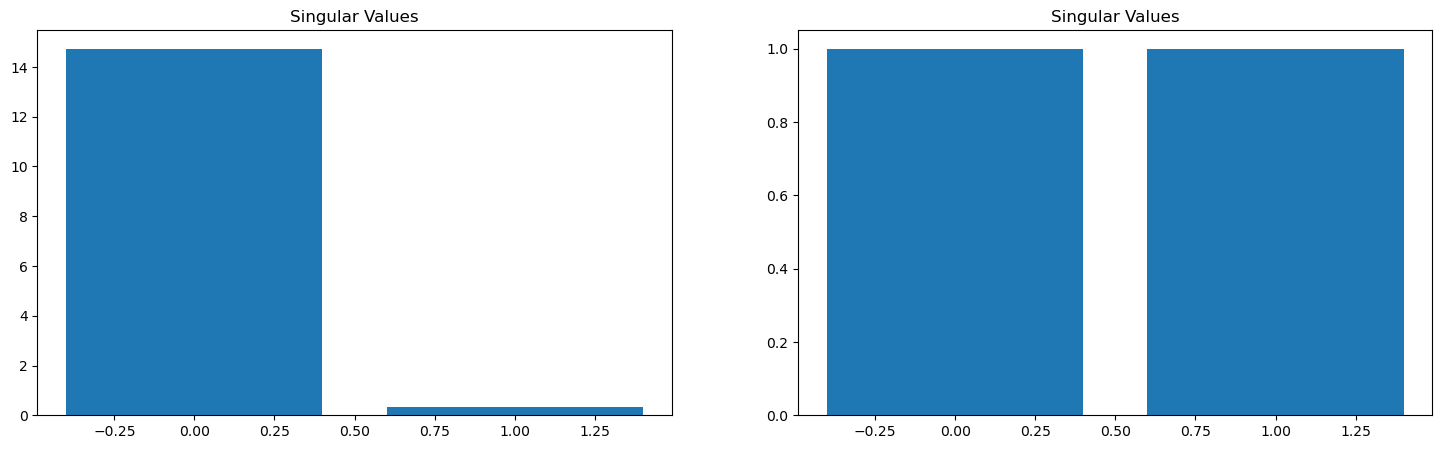

In [478]:
# and the SVD of U=U*I*I so singular values of U are all 1
fix,ax = plt.subplots(1,2,figsize=(18,5))
U,D,Vt = np.linalg.svd(X, full_matrices=False); ax[0].bar(x=range(2), height=D); ax[0].set_title("Singular Values"); 
U_,D_,Vt_ = np.linalg.svd(U, full_matrices=False); ax[1].bar(x=range(2), height=D_); ax[1].set_title("Singular Values"); 

<a name="cell-sovling-Axb"></a>

# 5.5 $Ax=b\;$in a few ways that aren't$\;A^{-1}$ ([Return to TOC](#cell-solving))

---

The `STA410_W24_Week4_Prerequesite_LinearAlgebra.ipynb` notebook demonstrates that $A^{-1}$ computation is best done as ***backward substitution*** with ***lower triangular forms*** (probably arrived at through ***Gaussian elimination***).

- <font style='color:white'>When unnecessary, actual $A^{-1}$ inversion is computationally wasteful...</font>
- <font style='color:white'>At best $A^{-1}$ computations will introduce ***roundoff error*** and at worst be ***ill-conditioned*** with large $\kappa(A^{-1})$</font>

<span style='color:white'>
    
That same notebook introduced the ***Woodbury Matrix Identity*** 

$$(A + UCV)^{−1} = A^{−1} − A^{−1}U (C^{−1} + VA^{−1}U)^{−1}VA^{−1}$$

which is trivial to invert if $A$ and $C$ are diagonal; and, it admits ***low rank*** $m<n$ matrix approximations, e.g., for $m=1$

$$ \Sigma_{n \times n}^{-1} \approx (I_{n \times n} + \mathbf{u}_{n\times m}(\mathbf{v}^T)_{n\times m})^{-1} = I - \mathbf{u}(1+\mathbf{v}^T\mathbf{u})^{-1}\mathbf{v}^T = I - \frac{\mathbf{u}\mathbf{v}^T}{1+\mathbf{v}^T\mathbf{u}} \quad \text{ with } A=I \text{ and } C=1$$

</span>



<a name="cell-sovling-Axb"></a>

# 5.5 $Ax=b\;$in a few ways that aren't$\;A^{-1}$ ([Return to TOC](#cell-solving))

---

The `STA410_W24_Week4_Prerequesite_LinearAlgebra.ipynb` notebook demonstrates that $A^{-1}$ computation is best done as ***backward substitution*** with ***lower triangular forms*** (probably arrived at through ***Gaussian elimination***).

- When unnecessary, actual $A^{-1}$ inversion is computationally wasteful... 
- At best $A^{-1}$ computations will introduce ***roundoff error*** and at worst be ***ill-conditioned*** <font style="color:gray">with large $\kappa(A^{-1})$</font>

<span style='color:white'>
    
That same notebook introduced the ***Woodbury Matrix Identity*** 

$$(A + UCV)^{−1} = A^{−1} − A^{−1}U (C^{−1} + VA^{−1}U)^{−1}VA^{−1}$$

which is trivial to invert if $A$ and $C$ are diagonal; and, it admits ***low rank*** $m<n$ matrix approximations, e.g., for $m=1$

$$ \Sigma_{n \times n}^{-1} \approx (I_{n \times n} + \mathbf{u}_{n\times m}(\mathbf{v}^T)_{n\times m})^{-1} = I - \mathbf{u}(1+\mathbf{v}^T\mathbf{u})^{-1}\mathbf{v}^T = I - \frac{\mathbf{u}\mathbf{v}^T}{1+\mathbf{v}^T\mathbf{u}} \quad \text{ with } A=I \text{ and } C=1$$

</span>



<a name="cell-sovling-Axb"></a>

# 5.5 $Ax=b\;$in a few ways that aren't$\;A^{-1}$ ([Return to TOC](#cell-solving))

---

The `STA410_W24_Week4_Prerequesite_LinearAlgebra.ipynb` notebook demonstrates that $A^{-1}$ computation is best done as ***backward substitution*** with ***lower triangular forms*** (probably arrived at through ***Gaussian elimination***).

- When unnecessary, actual $A^{-1}$ inversion is computationally wasteful... 
- At best $A^{-1}$ computations will introduce ***roundoff error*** and at worst be ***ill-conditioned*** <span style="color:gray">with large $\kappa(A^{-1})$</span>

That same notebook introduced the ***Woodbury Matrix Identity*** 

$$(A + UCV)^{−1} = A^{−1} − A^{−1}U (C^{−1} + VA^{−1}U)^{−1}VA^{−1}$$

which is trivial to invert if $A$ and $C$ are diagonal; and, it admits ***low rank*** $m<n$ matrix approximations, e.g., for $m=1$

$$ \Sigma_{n \times n}^{-1} \approx (I_{n \times n} + \mathbf{u}_{n\times m}(\mathbf{v}^T)_{n\times m})^{-1} = I - \mathbf{u}(1+\mathbf{v}^T\mathbf{u})^{-1}\mathbf{v}^T = I - \frac{\mathbf{u}\mathbf{v}^T}{1+\mathbf{v}^T\mathbf{u}} \quad \text{ with } A=I \text{ and } C=1$$




<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 


<span style="color:white">
    
If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$

$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$

<span>


<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 

    
If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$


$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

<span style="color:white">

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$

<span>


<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 

    
If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$


$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$

<span>


<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 


If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$

$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$



In [488]:
X = np.array([[0,0],[1,1],[2,2]]); Y = np.array([0,1,2]); print("X, Y:"); print(X, Y, end="\n\n"); print("(XtX)^-1:")
try:
    np.linalg.inv(X.T.dot(X))
except np.linalg.LinAlgError as err:
    print("ERROR:", err); print("'One does not simply invert a singular matrix' -- Boromir (The Lord of the Rings)", end='\n\n')

X, Y:
[[0 0]
 [1 1]
 [2 2]] [0 1 2]

(XtX)^-1:
ERROR: Singular matrix
'One does not simply invert a singular matrix' -- Boromir (The Lord of the Rings)



<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 


If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$

$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$



In [483]:
U,D,Vt = np.linalg.svd(X, full_matrices=False); D = np.diag(D) #U,D,Vt = np.linalg.svd(X.T.dot(X)); D = np.diag(D); 
print("XtX:"); print(X.T.dot(X), end="\n\n")
print("XtX from SVD:"); print(Vt.T.dot(D**2).dot(Vt)) #print(((U.dot(D).dot(Vt)).T.dot(U.dot(D).dot(Vt))), end="\n\n")

XtX:
[[5 5]
 [5 5]]

XtX from SVD:
[[5. 5.]
 [5. 5.]]


<a name="cell-sovling-svd"></a>

## 5.5.A The return of the SVD ([Return to TOC](#cell-solving))

---
The easiest inversions are for ***diagonal*** $D$ where $[D^{-1}]_{ii} = 1/D_{ii}$ and ***orthogonal*** $U$ where $U^{-1}=U^T$ 


If $A^{-1}$ exists then from the ***SVD*** $A = UDV^T$ and $A^{-1} = V D^{-} U^T$ with ***(semi-)orthogonal*** $U$ and $V$ and ***diagonal*** $D$

$$x = V D^{-1} U^Tb \quad \text{ solves } \quad x = A^{-1}b$$ 

For example, $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ provides the ***least squares*** approximation $X\hat \beta \approx  y$ is found the (unique) ***Moore-Penrose (generalized) inverse*** of $(X^TX)^+$ which follows directly from the ***SVD*** of $X = UDV^T$

$$\underset{(X^TX)^+(X^TX) = (X^TX)(X^TX)^+ = I}{(X^TX)^+ = V (D^{+})^2 V^T} \underset{\text{full rank}}{\overset{\text{if $X$ is}}{=}} (X^TX)^{-1} \text{ with } (D^{+}_{ii})^2=\frac{1}{D_{ii}^2} \text{ so that } \hat \beta=V (D^{+})^2 V^T X^T y$$



In [485]:
Dplus2 = np.zeros(D.shape); Dplus2[0,0] = 1/D[0,0]**2; print("XtX^+ from SVD:"); print(Vt.T.dot(Dplus2).dot(Vt), end="\n\n")    
Yhat = X.dot(Vt.T.dot(Dplus2).dot(Vt.T)).dot(X.T).dot(Y.T); print("Y, Yhat:"); print(Y, Yhat)

XtX^+ from SVD:
[[0.05 0.05]
 [0.05 0.05]]

Y, Yhat:
[0 1 2] [0. 1. 2.]


<a name="cell-sovling-chol"></a>

## 5.5.B The Cholesky ([Return to TOC](#cell-solving))

---

If ***condition number*** $\kappa(X^TX)$ isn't large then $X^TX$ has minimal ***roundoff error*** and ***full rank*** $X_{n \times m}$ means $(X^TX)_{m \times m}$

- is ***symmetric full rank***, so it has ***positive eigenvalues***, so it's ***positive definite*** with $x^TX^TXx > 0$


<span style="color:white">
    
***Symmetric*** $\Sigma = \Sigma^T$ and ***positive definite*** $x^T\Sigma x > 0$ has a ***Cholesky decomposition*** 

$$\Sigma = CC^T \quad \text{with lower triangular }C \text{ (which is unique when $C_{ii} >0$)}$$

    
so $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ providing the ***least squares*** approximation $X\hat \beta \approx  y$ can be solved for as

$$\begin{align*}
X^T\!X\hat \beta = X^T\!y \\${}$\\
= CC^T \hat \beta = {} & X^T\!y \\
\Longrightarrow  \text{ by solving for $\gamma$ in } \underset{L}{C} (\underbrace{C^T \hat \beta}_{\gamma}) = {} & X^T\!y \; \text{ and then $\hat \beta$ in} \; \underset{U}{C}^T \hat \beta = \gamma \quad \text{using }\textbf{backward substitution}\text{ }
  \end{align*}$$

</span>

- <font style="color:white">A ***Cholesky decomposition*** algorithm is considered in STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb</font>


<a name="cell-sovling-chol"></a>

## 5.5.B The Cholesky ([Return to TOC](#cell-solving))

---

If ***condition number*** $\kappa(X^TX)$ isn't large then $X^TX$ has minimal ***roundoff error*** and ***full rank*** $X_{n \times m}$ means $(X^TX)_{m \times m}$

- is ***symmetric full rank***, so it has ***positive eigenvalues***, so it's ***positive definite*** with $x^TX^TXx > 0$

***Symmetric*** $\Sigma = \Sigma^T$ and ***positive definite*** $x^T\Sigma x > 0$ has a ***Cholesky decomposition*** 

$$\Sigma = CC^T \quad \text{with lower triangular }C \text{ (which is unique when $C_{ii} >0$)}$$

<br><br>

<span style="color:white">
    
so $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ providing the ***least squares*** approximation $X\hat \beta \approx  y$ can be solved for as

$$\begin{align*}
X^T\!X\hat \beta = X^T\!y 
= CC^T \hat \beta = {} & X^T\!y \\
\Longrightarrow  \text{ by solving for $\gamma$ in } \underset{L}{C} (\underbrace{C^T \hat \beta}_{\gamma}) = {} & X^T\!y \; \text{ and then $\hat \beta$ in} \; \underset{U}{C}^T \hat \beta = \gamma \quad \text{using }\textbf{backward substitution}\text{ }
  \end{align*}$$

</span>

- <font style="color:white">A ***Cholesky decomposition*** algorithm is considered in STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb</font>


<a name="cell-sovling-chol"></a>

## 5.5.B The Cholesky ([Return to TOC](#cell-solving))

---

If ***condition number*** $\kappa(X^TX)$ isn't large then $X^TX$ has minimal ***roundoff error*** and ***full rank*** $X_{n \times m}$ means $(X^TX)_{m \times m}$

- is ***symmetric full rank***, so it has ***positive eigenvalues***, so it's ***positive definite*** with $x^TX^TXx > 0$

***Symmetric*** $\Sigma = \Sigma^T$ and ***positive definite*** $x^T\Sigma x > 0$ has a ***Cholesky decomposition*** 

$$\Sigma = CC^T \quad \text{with lower triangular }C \text{ (which is unique when $C_{ii} >0$)}$$

so $\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ providing the ***least squares*** approximation $X\hat \beta \approx  y$ can be solved for as

$$\begin{align*}
X^T\!X\hat \beta = X^T\!y 
= CC^T \hat \beta = {} & X^T\!y \\
\Longrightarrow  \text{ by solving for $\gamma$ in } \underset{L}{C} (\underbrace{C^T \hat \beta}_{\gamma}) = {} & X^T\!y \; \text{ and then $\hat \beta$ in} \; \underset{U}{C}^T \hat \beta = \gamma \quad \text{using }\textbf{backward substitution}\text{ }\\{}
  \end{align*}$$

- A ***Cholesky decomposition*** algorithm is considered in `STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb`


<a name="cell-sovling-chol-mvn"></a>

## 5.5.C Multivariate Normal ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** $\Sigma=CC^T$ and ***LU decomposition*** $\Sigma=LU$ algorithms are both $O(n^3)$ but the ***Cholesky***

- <font style="color:white">is constructed with half of as many operations</font>
- <font style="color:white">requires $n(n+1)/2$ elements, half of the $n^2+n$ elements stored in ***LU decomposition*** since $C$ is repeated</font>

- <font style="color:white">is twice as fast to ***invert*** since $(CC^T)^{-1} = (C^T)^{-1}C^{-1} = $ [$ \;(C^{-T})C^{-1}$] $= (C^{-1})^TC^{-1}$  only requires the computation of $C^{-1}$ while $(LU)^{-1} = U^{-1}L^{-1}$ requires both $L^{-1}$ and $U^{-1}$</font>

<!-- and so the ***Cholesky decomposition*** is an interesting exception to the typical ***time-space tradeoff*** since its construction outperforms ***LU decomposition*** both in computation *and* memory requirements. For additional details and commentary on ***Cholesky decomposition***, please see Keith Knight's STA410 [notes7.pdf](https://q.utoronto.ca/courses/296804/files?preview=24300633) document beginning on page 13 and [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) beginning on page 37. -->

<span style="color:white">
    
$$\text{Further }\quad \mathbf{Y} \sim MVN(\mathbf{0},\mathbf{I}) \quad \Longrightarrow \quad C Y \sim MVN(\mathbf{0}, \boldsymbol \Sigma=CC^T)$$

$$\text{and for }\quad \displaystyle (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})\right)$$

\begin{align*}
(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{ { [C C^T] }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }}) = 
[(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} } C^{-T}] C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b\\
[C^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})]^{\mathrm {T} } C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b \;\; \Longrightarrow \;\; \underbrace{\textbf{z}^T\textbf{z} = b}_{\textbf{z} = C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }})} \;\;  \underbrace{ \Longrightarrow \;\;  C\textbf{z} = \mathbf {Y} -{\boldsymbol {\mu }}}_{\text{solve for $\textbf{z}$ compute $\exp(\textbf{z}^T\textbf{z})$}} \\
\det(\boldsymbol {\Sigma }) = \underbrace{\det(CC^T) = \det(C)\det(C^T)}_{\text{produces and trangular matrices are easy}} =  & {} \prod_i C_{ii} \prod_i C_{ii}^T = \prod_i C_{ii}^2
\end{align*}
    
</span>

<a name="cell-sovling-chol-mvn"></a>

## 5.5.C Multivariate Normal ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** $\Sigma=CC^T$ and ***LU decomposition*** $\Sigma=LU$ algorithms are both $O(n^3)$ but the ***Cholesky***

- is constructed with half of as many operations</font>
- requires $n(n+1)/2$ elements, half of the $n^2+n$ elements stored in ***LU decomposition*** since $C$ is repeated

- <font style="color:white">is twice as fast to ***invert*** since $(CC^T)^{-1} = (C^T)^{-1}C^{-1} = $ [$ \;(C^{-T})C^{-1}$] $= (C^{-1})^TC^{-1}$  only requires the computation of $C^{-1}$ while $(LU)^{-1} = U^{-1}L^{-1}$ requires both $L^{-1}$ and $U^{-1}$</font>

<!-- and so the ***Cholesky decomposition*** is an interesting exception to the typical ***time-space tradeoff*** since its construction outperforms ***LU decomposition*** both in computation *and* memory requirements. For additional details and commentary on ***Cholesky decomposition***, please see Keith Knight's STA410 [notes7.pdf](https://q.utoronto.ca/courses/296804/files?preview=24300633) document beginning on page 13 and [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) beginning on page 37. -->

<span style="color:white">
    
$$\text{Further }\quad \mathbf{Y} \sim MVN(\mathbf{0},\mathbf{I}) \quad \Longrightarrow \quad C Y \sim MVN(\mathbf{0}, \boldsymbol \Sigma=CC^T)$$

$$\text{and for }\quad \displaystyle (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})\right)$$


\begin{align*}
(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{ { [C C^T] }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }}) = 
[(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} } C^{-T}] C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b\\
[C^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})]^{\mathrm {T} } C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b \;\; \Longrightarrow \;\; \underbrace{\textbf{z}^T\textbf{z} = b}_{\textbf{z} = C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }})} \;\;  \underbrace{ \Longrightarrow \;\;  C\textbf{z} = \mathbf {Y} -{\boldsymbol {\mu }}}_{\text{solve for $\textbf{z}$ compute $\exp(\textbf{z}^T\textbf{z})$}} \\
\det(\boldsymbol {\Sigma }) = \underbrace{\det(CC^T) = \det(C)\det(C^T)}_{\text{produces and trangular matrices are easy}} =  & {} \prod_i C_{ii} \prod_i C_{ii}^T = \prod_i C_{ii}^2
\end{align*}
    
</span>

<a name="cell-sovling-chol-mvn"></a>

## 5.5.C Multivariate Normal ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** $\Sigma=CC^T$ and ***LU decomposition*** $\Sigma=LU$ algorithms are both $O(n^3)$ but the ***Cholesky***

- is constructed with half of as many operations</font>
- requires $n(n+1)/2$ elements, half of the $n^2+n$ elements stored in ***LU decomposition*** since $C$ is repeated

- is twice as fast to ***invert*** since $(CC^T)^{-1} = (C^T)^{-1}C^{-1} = $ [$ \;(C^{-T})C^{-1}$](https://math.stackexchange.com/questions/340233/transpose-of-inverse-vs-inverse-of-transpose) $= (C^{-1})^TC^{-1}$  only requires the computation of $C^{-1}$ while $(LU)^{-1} = U^{-1}L^{-1}$ requires both $L^{-1}$ and $U^{-1}$

<!-- and so the ***Cholesky decomposition*** is an interesting exception to the typical ***time-space tradeoff*** since its construction outperforms ***LU decomposition*** both in computation *and* memory requirements. For additional details and commentary on ***Cholesky decomposition***, please see Keith Knight's STA410 [notes7.pdf](https://q.utoronto.ca/courses/296804/files?preview=24300633) document beginning on page 13 and [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) beginning on page 37. -->

<span style="color:white">
    
$$\text{Further }\quad \mathbf{Y} \sim MVN(\mathbf{0},\mathbf{I}) \quad \Longrightarrow \quad C Y \sim MVN(\mathbf{0}, \boldsymbol \Sigma=CC^T)$$

$$\text{and for }\quad \displaystyle (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})\right)$$


\begin{align*}
(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{ { [C C^T] }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }}) = 
[(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} } C^{-T}] C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b\\
[C^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})]^{\mathrm {T} } C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b \;\; \Longrightarrow \;\; \underbrace{\textbf{z}^T\textbf{z} = b}_{\textbf{z} = C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }})} \;\;  \underbrace{ \Longrightarrow \;\;  C\textbf{z} = \mathbf {Y} -{\boldsymbol {\mu }}}_{\text{solve for $\textbf{z}$ compute $\exp(\textbf{z}^T\textbf{z})$}} \\
\det(\boldsymbol {\Sigma }) = \underbrace{\det(CC^T) = \det(C)\det(C^T)}_{\text{produces and trangular matrices are easy}} =  & {} \prod_i C_{ii} \prod_i C_{ii}^T = \prod_i C_{ii}^2
\end{align*}
    
</span>

<a name="cell-sovling-chol-mvn"></a>

## 5.5.C Multivariate Normal ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** $\Sigma=CC^T$ and ***LU decomposition*** $\Sigma=LU$ algorithms are both $O(n^3)$ but the ***Cholesky***

- is constructed with half of as many operations
- requires $n(n+1)/2$ elements, half of the $n^2+n$ elements stored in ***LU decomposition*** since $C$ is repeated

- is twice as fast to ***invert*** since $(CC^T)^{-1} = (C^T)^{-1}C^{-1} = $ [$ \;(C^{-T})C^{-1}$](https://math.stackexchange.com/questions/340233/transpose-of-inverse-vs-inverse-of-transpose) $= (C^{-1})^TC^{-1}$  only requires the computation of $C^{-1}$ while $(LU)^{-1} = U^{-1}L^{-1}$ requires both $L^{-1}$ and $U^{-1}$

<!-- and so the ***Cholesky decomposition*** is an interesting exception to the typical ***time-space tradeoff*** since its construction outperforms ***LU decomposition*** both in computation *and* memory requirements. For additional details and commentary on ***Cholesky decomposition***, please see Keith Knight's STA410 [notes7.pdf](https://q.utoronto.ca/courses/296804/files?preview=24300633) document beginning on page 13 and [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) beginning on page 37. -->

$$\text{Further }\quad \mathbf{Y} \sim MVN(\mathbf{0},\mathbf{I}) \quad \Longrightarrow \quad C Y \sim MVN(\mathbf{0}, \boldsymbol \Sigma=CC^T)$$

$$\text{so to evaluate }\quad \displaystyle (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})\right)$$


\begin{align*}
(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{ { [C C^T] }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }}) = 
[(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} } C^{-T}] C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b\\
[C^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})]^{\mathrm {T} } C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b \;\; \Longrightarrow \;\; \underbrace{\textbf{z}^T\textbf{z} = b}_{\textbf{z} = C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }})} \;\;  \underbrace{ \Longrightarrow \;\;  C\textbf{z} = \mathbf {Y} -{\boldsymbol {\mu }}}_{\text{solve for $\textbf{z}$ compute $\exp(\textbf{z}^T\textbf{z})$}} \\
\color{white}{\det(\boldsymbol {\Sigma }) = \underbrace{\det(CC^T) = \det(C)\det(C^T)}_{\text{produces and trangular matrices are easy}} = } & {} \color{white}{\prod_i C_{ii} \prod_i C_{ii}^T = \prod_i C_{ii}^2}
\end{align*}

<a name="cell-sovling-chol-mvn"></a>

## 5.5.C Multivariate Normal ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** $\Sigma=CC^T$ and ***LU decomposition*** $\Sigma=LU$ algorithms are both $O(n^3)$ but the ***Cholesky***

- is constructed with half of as many operations
- requires $n(n+1)/2$ elements, half of the $n^2+n$ elements stored in ***LU decomposition*** since $C$ is repeated

- is twice as fast to ***invert*** since $(CC^T)^{-1} = (C^T)^{-1}C^{-1} = $ [$ \;(C^{-T})C^{-1}$](https://math.stackexchange.com/questions/340233/transpose-of-inverse-vs-inverse-of-transpose) $= (C^{-1})^TC^{-1}$  only requires the computation of $C^{-1}$ while $(LU)^{-1} = U^{-1}L^{-1}$ requires both $L^{-1}$ and $U^{-1}$

<!-- and so the ***Cholesky decomposition*** is an interesting exception to the typical ***time-space tradeoff*** since its construction outperforms ***LU decomposition*** both in computation *and* memory requirements. For additional details and commentary on ***Cholesky decomposition***, please see Keith Knight's STA410 [notes7.pdf](https://q.utoronto.ca/courses/296804/files?preview=24300633) document beginning on page 13 and [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) beginning on page 37. -->

$$\text{Further }\quad \mathbf{Y} \sim MVN(\mathbf{0},\mathbf{I}) \quad \Longrightarrow \quad C Y \sim MVN(\mathbf{0}, \boldsymbol \Sigma=CC^T)$$

$$\text{so to evaluate }\quad \displaystyle (2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})\right)$$


\begin{align*}
(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} }{ { [C C^T] }}^{-1}(\mathbf {Y} -{\boldsymbol {\mu }}) = 
[(\mathbf {Y} -{\boldsymbol {\mu }})^{\mathrm {T} } C^{-T}] C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b\\
[C^{-1}(\mathbf {Y} -{\boldsymbol {\mu }})]^{\mathrm {T} } C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }}) = {} & b \;\; \Longrightarrow \;\; \underbrace{\textbf{z}^T\textbf{z} = b}_{\textbf{z} = C^{-1} (\mathbf {Y} -{\boldsymbol {\mu }})} \;\;  \underbrace{ \Longrightarrow \;\;  C\textbf{z} = \mathbf {Y} -{\boldsymbol {\mu }}}_{\text{solve for $\textbf{z}$ compute $\exp(\textbf{z}^T\textbf{z})$}} \\
\det(\boldsymbol {\Sigma }) = \underbrace{\det(CC^T) = \det(C)\det(C^T)}_{\text{produces and trangular matrices are easy}} =  & {} \prod_i C_{ii} \prod_i C_{ii}^T = \prod_i C_{ii}^2
\end{align*}

<a name="cell-sovling-mvn"></a>

## 5.5.D Square Root Decomposition ([Return to TOC](#cell-solving))

---

***Cholesky decomposition*** is sometimes referred to as the ***square-root decomposition***...<br> but for ***symmetric nonnegative definite*** $A$ the ***square-root decomposition*** is already defined based on ***diagonal*** $D$ and ***orthogonal*** $V$ as

$$A^{\frac{1}{2}} = VD^{\frac{1}{2}}V^T \quad \text{ such that } \quad \left(A^{\frac{1}{2}}\right)^2= VDV^T = A$$

***Square-root decomposition*** often proves useful in theoretical settings<br> whereas the computational efficiencies of ***Cholesky decomposition*** lead to its ubiquity in applied settings

> The ***singular values = eigenvalues*** in ***PCA*** $X^TX=UDV^T = VDV^T$ <br>provide a ***square-root decomposition*** 
>
>  $$(X^TX)^{\frac{1}{2}} = VD^{\frac{1}{2}}V^T$$
>
>  where $D^{\frac{1}{2}} = \tilde D$ are the ***singular values*** from $X = \tilde U \tilde DV^T$  



<a name="cell-sovling-qr"></a>

## 5.5.E $QR$ Decomposition ([Return to TOC](#cell-solving))

---

***(Modified) Gram-Schmidt procedure*** processes $X$ into a ***linearly independent*** columns that can be ***normalized*** as $Q$

- ***(Modified) Gram-Schmidt procedure*** details are addressed in `STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb`

<span style="color:white">
    
Column $j$ of $Q$ is a linear combination of the first $j$ columns of $X$ so for some ***upper trapezoidal matrix*** $R$

$$X = QR \quad \text{ with }\textbf{(semi-)orthonormal } {Q_{\cdot j}^TQ_{\cdot j'} = \left\{\begin{array}{l}1: \text{if } j=j' \quad  \text{i.e., the columns are normal vectors}\\0: \text{if } j\not=j'  \quad \text{i.e., the columns are orthogonal}\end{array}\right.}$$

The ***QR decomposition*** is ***rank revealing*** when $X$ is not ***full rank***, since ***linearly dependent*** produce $\mathbf{0}$ column vectors

$$\overset{\text{rank } r}{X_{n\times m}} = 
\overset{\text{orthonormal}}{\left[\overbrace{Q_{n\times r}}^{\text{semi-}} \; \Big | \; \mathbf{0}_{n\times (n-r)}\right]}_{n \times n} \overset{\text{trapezoidal}}{\left[\begin{array}{c}R_{r\times m}\\\mathbf{0}\end{array} \right]}_{n \times m} = \;\;\;Q_{n\times r}R_{r\times m}$$

</span>

- <font style="color:white">$Q$ can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***) which are especially efficient if the data arives from memory row by row</font>

<!-- As noted beginning on page 39 of Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document, even though the ***(modified) Gram-Schmidt procedure*** is more numerically precise that the original ***Gram-Schmidt procedure***, the $Q$ matrix can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***), which are especially efficient if the data arives from memory row by row. -->


<a name="cell-sovling-qr"></a>

## 5.5.E $QR$ Decomposition ([Return to TOC](#cell-solving))

---

***(Modified) Gram-Schmidt procedure*** processes $X$ into a ***linearly independent*** columns that can be ***normalized*** as $Q$

- ***(Modified) Gram-Schmidt procedure*** details are addressed in `STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb`


    
Column $j$ of $Q$ is a linear combination of the first $j$ columns of $X$ so for some ***upper trapezoidal matrix*** $R$

$$X = QR \quad \text{ with }\textbf{(semi-)orthonormal } {Q_{\cdot j}^TQ_{\cdot j'} = \left\{\begin{array}{l}1: \text{if } j=j' \quad  \text{i.e., the columns are normal vectors}\\0: \text{if } j\not=j' \quad \text{i.e., the columns are orthogonal}\end{array}\right.}$$


<span style="color:white">
    
The ***QR decomposition*** is ***rank revealing*** when $X$ is not ***full rank***, since ***linearly dependent*** produce $\mathbf{0}$ column vectors

$$\overset{\text{rank } r}{X_{n\times m}} = 
\overset{\text{orthonormal}}{\left[\overbrace{Q_{n\times r}}^{\text{semi-}} \; \Big | \; \mathbf{0}_{n\times (n-r)}\right]}_{n \times n} \overset{\text{trapezoidal}}{\left[\begin{array}{c}R_{r\times m}\\\mathbf{0}\end{array} \right]}_{n \times m} = \;\;\;Q_{n\times r}R_{r\times m}$$

</span>

- <font style="color:white">$Q$ can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***) which are especially efficient if the data arives from memory row by row</font>

<!-- As noted beginning on page 39 of Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document, even though the ***(modified) Gram-Schmidt procedure*** is more numerically precise that the original ***Gram-Schmidt procedure***, the $Q$ matrix can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***), which are especially efficient if the data arives from memory row by row. -->


<a name="cell-sovling-qr"></a>

## 5.5.E $QR$ Decomposition ([Return to TOC](#cell-solving))

---

***(Modified) Gram-Schmidt procedure*** processes $X$ into a ***linearly independent*** columns that can be ***normalized*** as $Q$

- ***(Modified) Gram-Schmidt procedure*** details are addressed in `STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb`

Column $j$ of $Q$ is a linear combination of the first $j$ columns of $X$ so for some ***upper trapezoidal matrix*** $R$

$$X = QR \quad \text{ with }\textbf{(semi-)orthonormal } {Q_{\cdot j}^TQ_{\cdot j'} = \left\{\begin{array}{l}1: \text{if } j=j' \quad  \text{i.e., the columns are normal vectors}\\0: \text{if } j\not=j'  \quad \text{i.e., the columns are orthogonal}\end{array}\right.}$$

The ***QR decomposition*** is ***rank revealing*** when $X$ is not ***full rank***, since ***linearly dependent*** produce $\mathbf{0}$ column vectors

$$\overset{\text{rank } r}{X_{n\times m}} = 
\overset{\text{orthonormal}}{\left[\overbrace{Q_{n\times r}}^{\text{semi-}} \; \Big | \; \mathbf{0}_{n\times (n-r)}\right]}_{n \times n} \overset{\text{trapezoidal}}{\left[\begin{array}{c}R_{r\times m}\\\mathbf{0}\end{array} \right]}_{n \times m} = \;\;\;Q_{n\times r}R_{r\times m}$$

- $Q$ can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***) which are especially efficient if the data arives from memory row by row

<!-- As noted beginning on page 39 of Keith Knight's STA410 [notes9.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301088) document, even though the ***(modified) Gram-Schmidt procedure*** is more numerically precise that the original ***Gram-Schmidt procedure***, the $Q$ matrix can be even more precisely calculated using ***Householder transformations*** (or ***reflections***); or, using ***Givens transformations*** (or ***rotations***), which are especially efficient if the data arives from memory row by row. -->


<a name="cell-sovling-qr"></a>

## 5.5.E $QR$ Decomposition ([Return to TOC](#cell-solving))

---

***(Modified) Gram-Schmidt procedure*** processes $X$ into a ***linearly independent*** columns that can be ***normalized*** as $Q$

- ***(Modified) Gram-Schmidt procedure*** details are addressed in `STA410_W24_Week5_Extra_LinearAlgebraAlgorithms.ipynb`

Column $j$ of $Q$ is a linear combination of the first $j$ columns of $X$ so for some ***upper trapezoidal matrix*** $R$

$$X = QR \quad \text{ with }\textbf{(semi-)orthonormal } {Q_{\cdot j}^TQ_{\cdot j'} = \left\{\begin{array}{l}1: \text{if } j=j' \quad  \text{i.e., the columns are normal vectors}\\0: \text{if } j\not=j'  \quad \text{i.e., the columns are orthogonal}\end{array}\right.}$$

When $X=QR$ is ***full rank*** $R$ will be an ***upper triangular (full rank) matrix*** so that
$\hat \beta$ solving $\;X^TX\hat \beta = X^Ty\;$ providing the ***least squares*** approximation $X\hat \beta \approx  y$ can be immediately solved for using ***backward substitution*** on

\begin{eqnarray*}
X^TX \hat \beta = & X^T y \\
\Longrightarrow R^TR \hat \beta = & R^TQ^T y\\
\overset{(R^T)^{-1} \text{ exists}}{\quad \quad \Longrightarrow} R \hat \beta = & Q^T y
\end{eqnarray*}

leading to the [general advice](https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why) to solve for $\hat \beta$ via ***QR decomposition*** rather than computing $X^TX$


<!-- 

***QR Decomposition*** can also speed up solving ($n>m$) ***overdetermined*** (but ***consistent***) $A_{n \times m}x=b$ (as opposed to $Ax\approx b$) whenever $\text{rank}(A) =r << m$ since 

$$A_{n \times m}x = \left[Q_{n \times r}|Q_{n \times (m-r)}'\right] \left[\begin{array}{c}R_{r\times m}\\\mathbf{0}\end{array} \right] x=b \quad \text{ so } \quad \left[\begin{array}{c}R\\\mathbf{0}\end{array} \right]x = \left[\begin{array}{c}Q^T\\ Q'^T\end{array} \right] b$$

and (when $A_{n \times m}x=b$ is indeed ***consistent***)

$$R_{r\times r} \overbrace{\left[\begin{array}{c}\tilde x_{r\times 1}\\\mathbf{0}\end{array} \right]}^{x} =  \overbrace{\left[\begin{array}{c} Q^T_{r \times n} b_{n\times 1}\\\mathbf{0}\end{array} \right]}^{Q^Tb} \quad \text{ so } \quad R_{r \times r} \tilde x = Q^Tb$$

and this is a very small ***backward substitution*** compared to $L_{n \times n}^{-1} A_{n \times m}x = U_{n \times m}x = L_{n \times n}^{-1}b$.

So even though $O(n^2m)$ ***QR decomposition*** will be about 5 times slower than ***Gaussian*** elimination (as seen above), this disadvantage may be made up for during the ***backward substitution*** step where $O(r^2)$ can be substantially faster than $O(nm)$.  And, actually, the general solution to an ***overdetermined*** system is to use the ***pseudoinverse*** available from ***SVD***. 

n = 1000
A, b = stats.norm.rvs(size=(n,n)), stats.norm.rvs(size=(n,1))

%timeit np.linalg.qr(A)

%timeit np.linalg.solve(A,b)

n,m = 2000,10
X, y = stats.norm.rvs(size=(n,m)), stats.norm.rvs(size=(n,1))
y = X[:,0]+X[:,1]

%timeit Q,R = scipy.linalg.qr(np.tile(X,100)); np.linalg.solve(R[:10,:10], (Q.T@y)[:10])

# np.linalg.lstsq(X,y, rcond=None)
# https://stats.stackexchange.com/questions/240573/how-does-numpy-solve-least-squares-for-underdetermined-systems
%timeit np.linalg.lstsq(np.tile(X,100),y, rcond=None)
# Actually, numpy doesn't do an LU decomposition / Guassian elimination approach
# rather, it uses SVD; still, this maintains a larger memory footprint than QR
# https://math.stackexchange.com/questions/3252351/when-solving-a-linear-system-why-svd-is-preferred-over-qr-to-make-the-solution
-->

<!-- 
- The use of the ***QR decomposition*** for estimating a least squares linear model fit will be considered further in [Programming Portfolio Assignment 1 Problem 2](#cell-solving-start). 
-->

<!-- a very interesting point to follow up on with Cholesky... could cholesky work?? can add this to the homework... -->
<!-- https://www.quora.com/Is-it-better-to-do-QR-Cholesky-or-SVD-for-solving-least-squares-estimate-and-why -->

<a name="cell-sovling-gradients"></a>

# [TO BE MOVED TO NEXT WEEK MATERIALS] Gradients ([Return to TOC](#cell-solving))

--- 

The ***operator*** (i.e., function returning a function) $\nabla_{x}$ is called the ***gradient*** and generalizes the ***derivative for scalar quantities*** as the vector collection of all the ***partial derivatives*** of its argument, the ***scalar valued multivariate function*** $f_x$, with respect to input elements $x_i$ of $f_x$

$$ \nabla_{x}(f_x) = \frac{\partial f_x}{\partial x_1} e_1 + \cdots + \frac{\partial f_x}{\partial x_i} e_i + \cdots + \frac{\partial f_x}{\partial x_n} e_n $$

for ***standard basis vectors*** $e_i$.

Like the ***derivative***, the ***gradient*** is a ***linear operator*** with 
 
$$\nabla_{x}(af_x+bg_x) = a\nabla_{x}(f_x) + b\nabla_{x}(g_x)$$

and (as seen above) has the simple rules such as

$$\nabla_{x} x^Tb = b \quad \text{ and } \quad \nabla_{x} x^TAx = 2Ax$$

<a name="cell-sovling-lulike"></a>

# [TO BE MOVED TO NEXT WEEK MATERIALS] 3.3.2 Finding $X\hat \beta \approx y$ by solving for $\hat \beta$ in $\overset{A\, x}{X^T\!X \hat \beta} = \overset{b}{X^t y}$ ([Return to TOC](#cell-solving))

---

The linear regression model $y = X\beta + \epsilon$ can be re-expressed as the ($n>m$) ***overdetermined*** problem

$$\begin{align*}
 \overbrace{X_{n \times m} \hat \beta}^{A\,x} = {} & \overbrace{y - \hat \epsilon}^{b} 
\end{align*}$$

Of course unless $\epsilon=0$, this leads to the ***inconsistent*** system of equations $X \hat \beta \not = y$. However, $X \hat \beta \approx y$ if 

<!--
$$\begin{align*}
\hat \beta = {} & \underset{\quad \; \beta: \; \hat \epsilon \; = \; y - X\beta }{\text{argmin } ||\hat \epsilon||_2^2} \\
 = {} & \underset{\beta}{\text{argmin }} ||y - X \beta ||_2^2 = \underset{\beta}{\text{argmin }} (y - X \beta )^T(y - X \beta ) \\
\end{align*}
$$
-->

\begin{align*}
  \hat \beta = {} & \underset{\quad \; \beta: \; \hat \epsilon \; = \; X\beta - y}{\text{argmin } ||\hat \epsilon||_2^2} 
  = \underset{\beta}{\text{argmin }} ||y-X \beta||_2^2  \\
  = {} & \underset{\beta}{\text{argmin }} (y-X \beta)^T(y- X \beta) 
  = \underset{\beta}{\text{argmin }} \underbrace{\beta^TX^TX \beta -2\beta^TX^Ty}_{f(\beta)} \\
  0 = {} & \overbrace{\nabla_\beta \left( \beta^TX^TX \beta -2\beta^TX^Ty \right)}^{\nabla_\beta f(\hat \beta )}\\
  0 = {} &  X^TX \hat \beta - X^T y  \quad \Longrightarrow \quad  \underset{{\text{$\sum_i \hat \epsilon_i = 0$ if $X$ has an intercept column} }}{\overset{\text{residuals are othogonal to columns $X_{*j}$}}{0 = X^T (X \hat \beta - y) = X^T\hat \epsilon }} \\
  \Longrightarrow \quad X^T y = {} &  X^TX \hat \beta \quad \longleftarrow \quad \textrm{the so-called } \textit{normal equations}
  \end{align*}

so that $\hat \beta$ above is the solution to the ***normal equations*** $\overbrace{(X^TX) \hat \beta}^{A\,x} = \overbrace{X^TY}^{b}$, which leads to the familiar analytical solution $\underbrace{\hat \beta}_x = \underbrace{(X^TX)^{-1}}_{A^{-1}}\underbrace{X^TY}_b$.

So 

$$X \hat \beta\approx y \quad \text{ transforms into } \quad X^TX\hat \beta = X^Ty \quad (\text{or generically } Ax = b)$$ 

such that solving for $\hat \beta$ in the latter provides $X \hat \beta\approx y$.